In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and describing dataset

In [3]:
# Loading dataset
data = pd.read_csv("archive/Training.csv")
# print(data.columns)
data = data.drop(columns=[data.columns[-1]])
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the count of each diseases in the dataset.

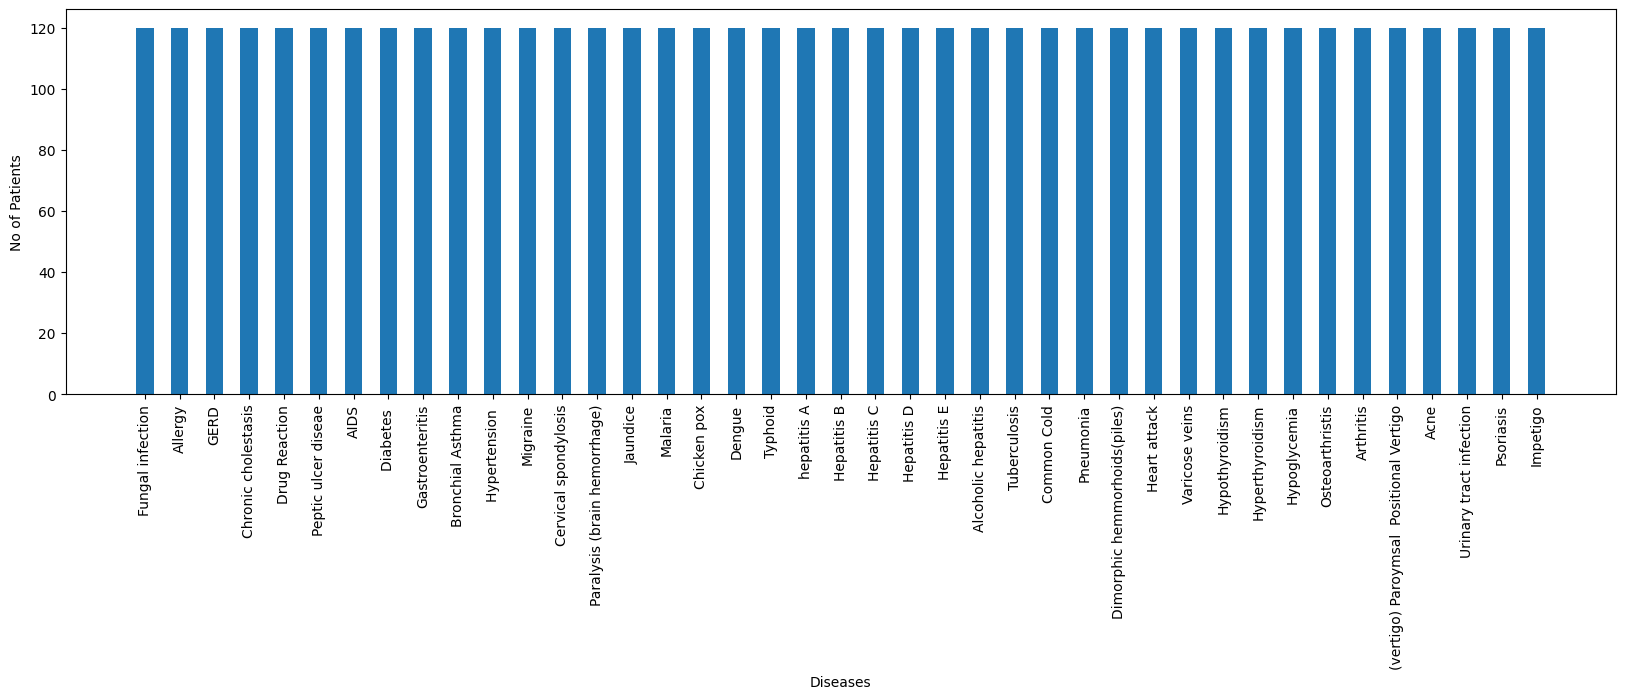

In [4]:
# disease_dist
diseases = data["prognosis"].unique()
diseases_count = [len(data[data["prognosis"]==x]) for x in diseases]
# print(diseases_count)
# print(f"Total of {len(diseases)} Unique diseases are : ", end="")
# print(f"{[x for x in diseases]}")
plt.figure(figsize=(20,5))
plt.bar(diseases,diseases_count,width=0.5)
plt.xlabel("Diseases")
plt.ylabel("No of Patients")
plt.xticks(rotation=90)
plt.show()

In [5]:
disease_to_symptom={}
for disease in data["prognosis"].unique():
    
    disease_data = data[data["prognosis"]==disease].drop(columns=["prognosis"])
    symptoms = []
    for x in disease_data.columns:
        if(sum(disease_data[x])!=0):
            symptoms.append(x)
    disease_to_symptom[disease]=len(symptoms)
for x in disease_to_symptom.items():
    print(f'{x}')

('Fungal infection', 4)
('Allergy', 4)
('GERD', 6)
('Chronic cholestasis', 7)
('Drug Reaction', 5)
('Peptic ulcer diseae', 6)
('AIDS', 4)
('Diabetes ', 10)
('Gastroenteritis', 4)
('Bronchial Asthma', 6)
('Hypertension ', 5)
('Migraine', 9)
('Cervical spondylosis', 5)
('Paralysis (brain hemorrhage)', 4)
('Jaundice', 8)
('Malaria', 8)
('Chicken pox', 11)
('Dengue', 14)
('Typhoid', 11)
('hepatitis A', 11)
('Hepatitis B', 12)
('Hepatitis C', 6)
('Hepatitis D', 9)
('Hepatitis E', 13)
('Alcoholic hepatitis', 7)
('Tuberculosis', 16)
('Common Cold', 17)
('Pneumonia', 11)
('Dimorphic hemmorhoids(piles)', 5)
('Heart attack', 4)
('Varicose veins', 7)
('Hypothyroidism', 13)
('Hyperthyroidism', 11)
('Hypoglycemia', 12)
('Osteoarthristis', 6)
('Arthritis', 5)
('(vertigo) Paroymsal  Positional Vertigo', 6)
('Acne', 4)
('Urinary tract infection', 4)
('Psoriasis', 6)
('Impetigo', 5)


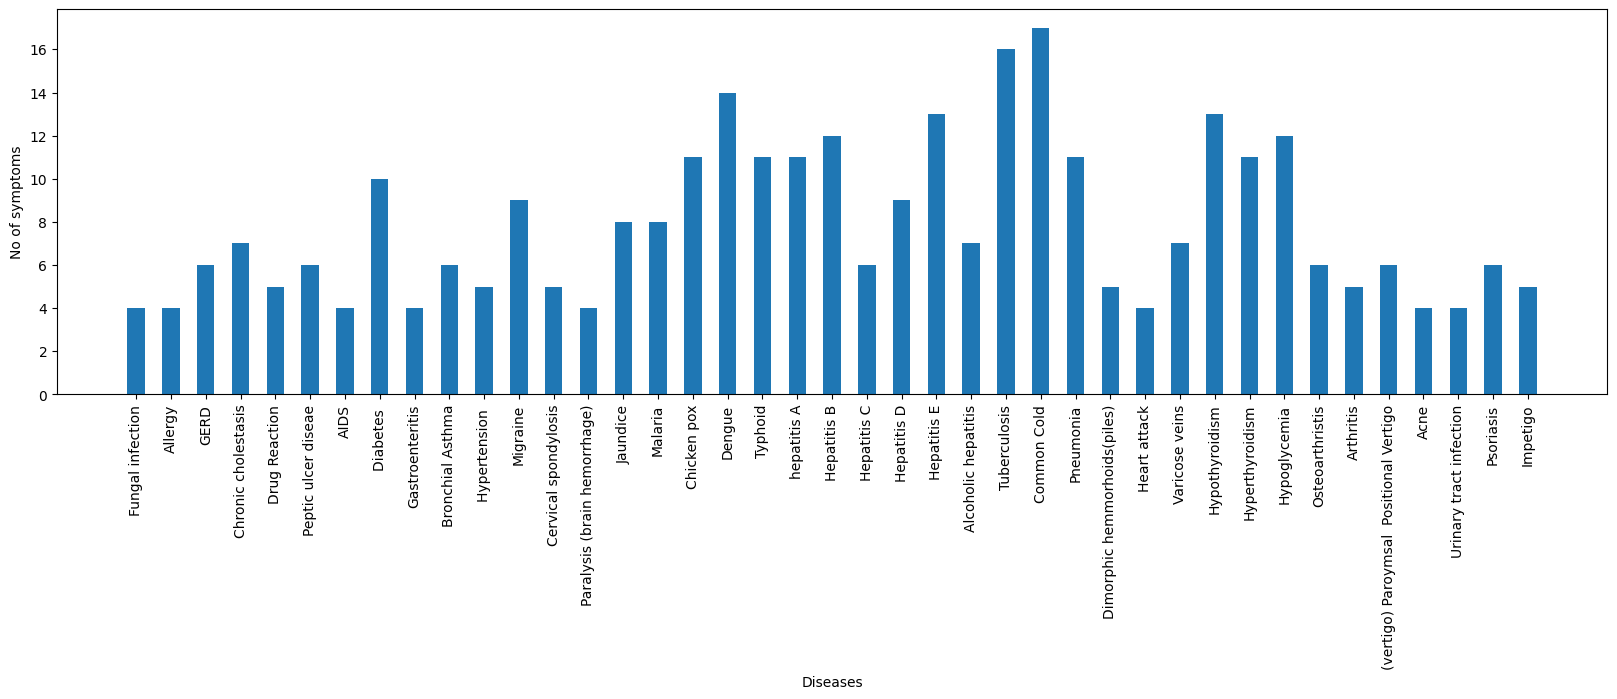

In [6]:
plt.figure(figsize=(20,5))
plt.bar(disease_to_symptom.keys(),disease_to_symptom.values(),width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Diseases")
plt.ylabel("No of symptoms")
plt.show()

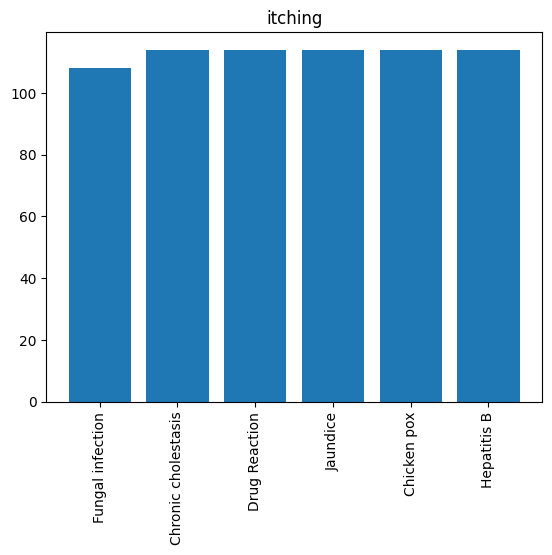

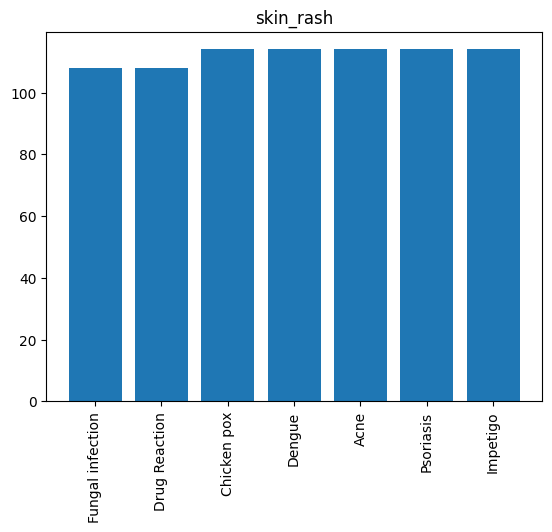

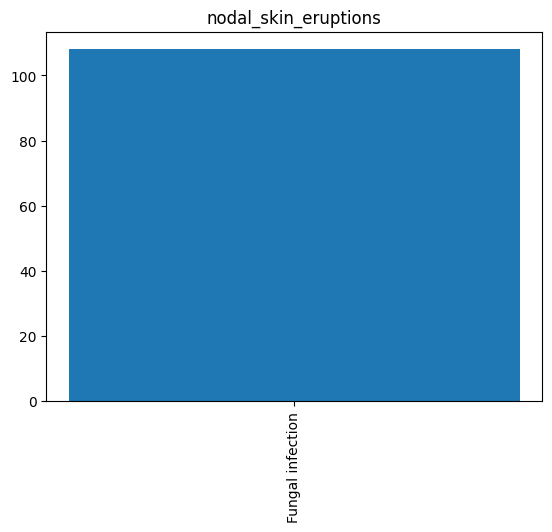

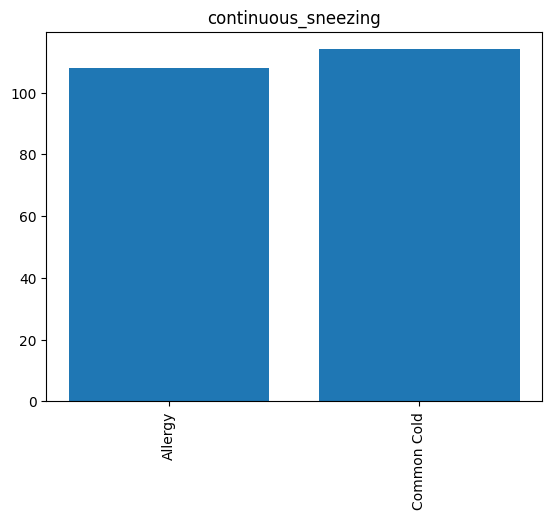

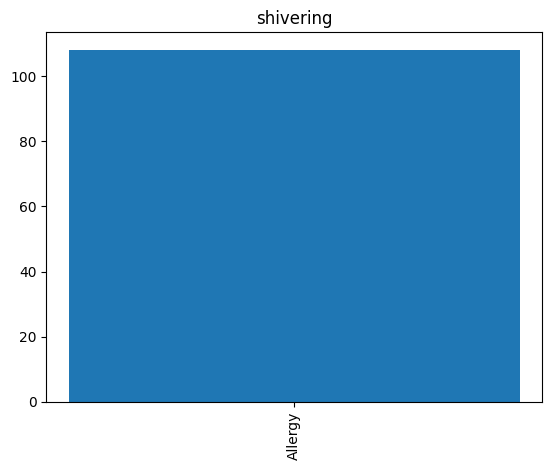

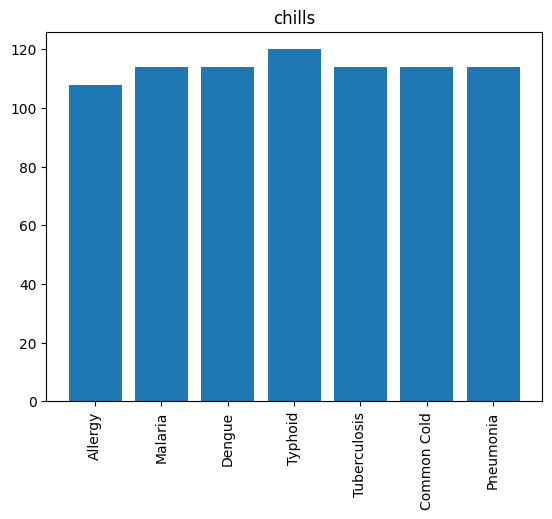

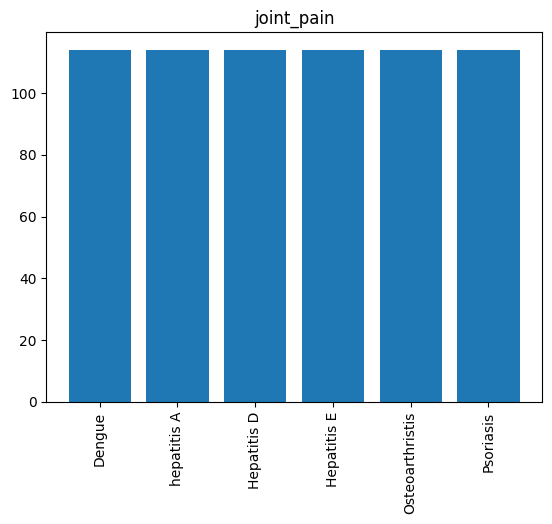

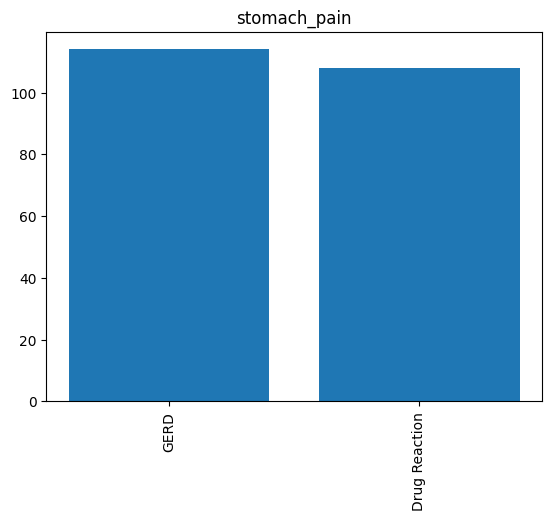

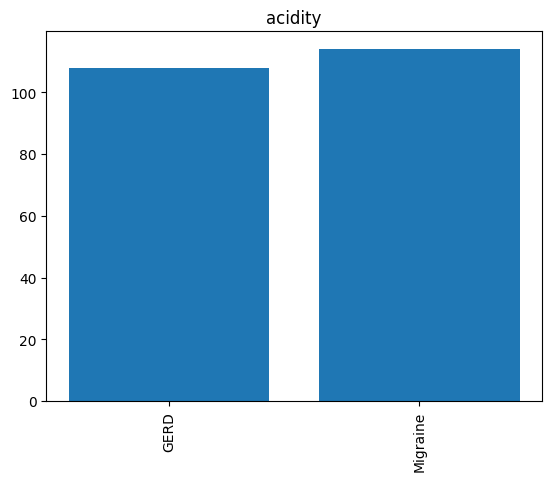

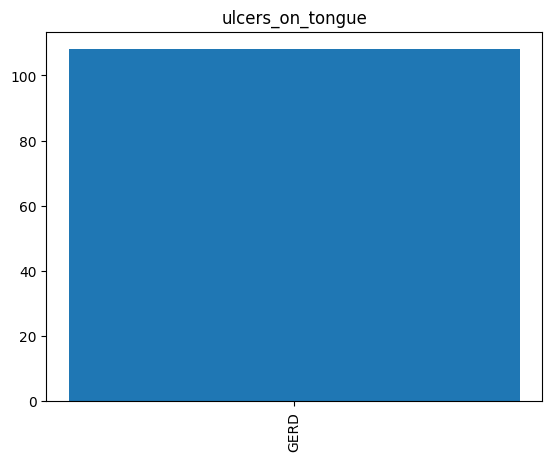

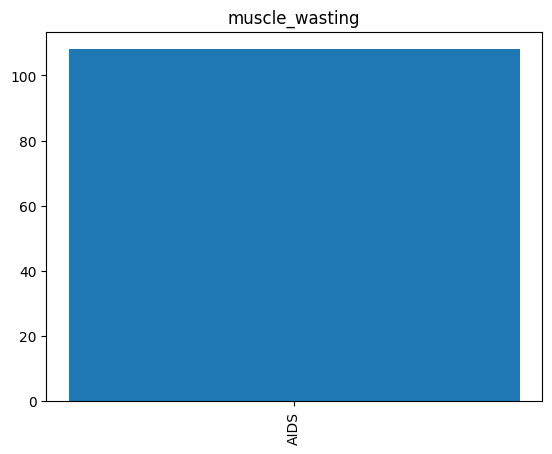

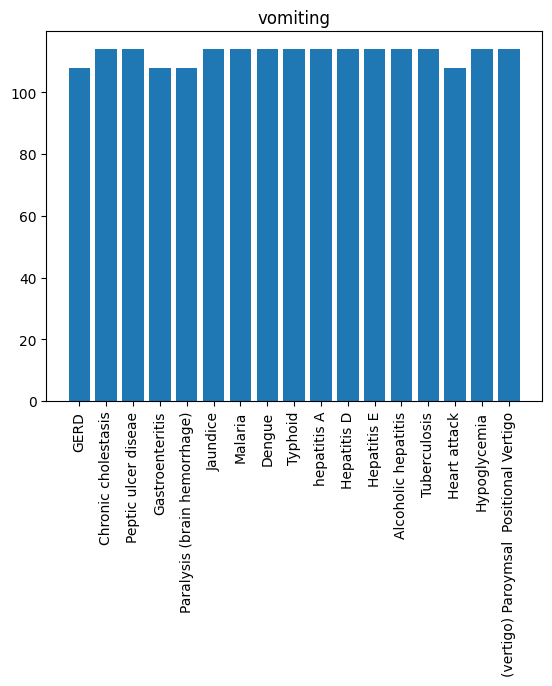

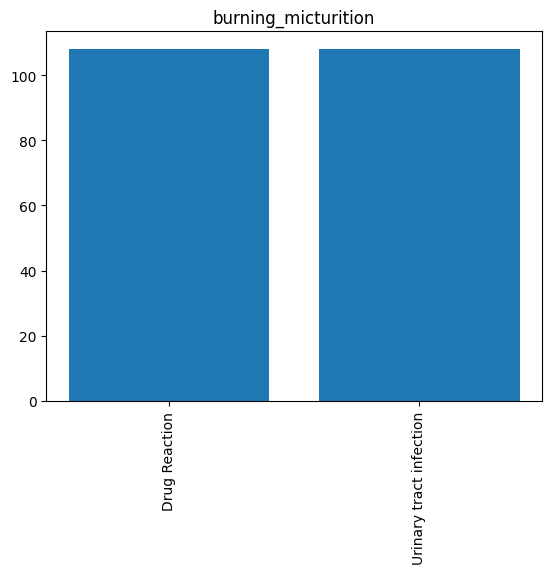

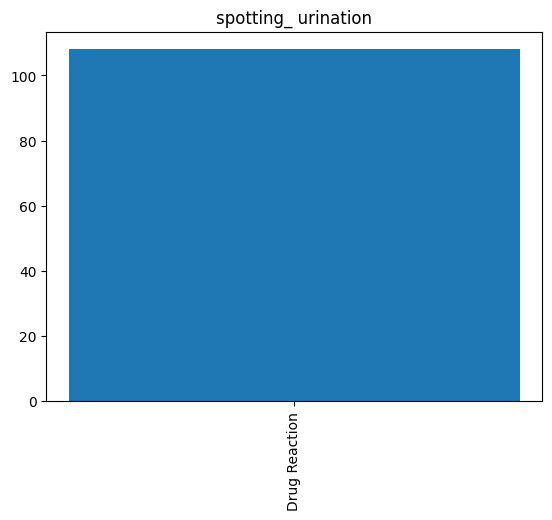

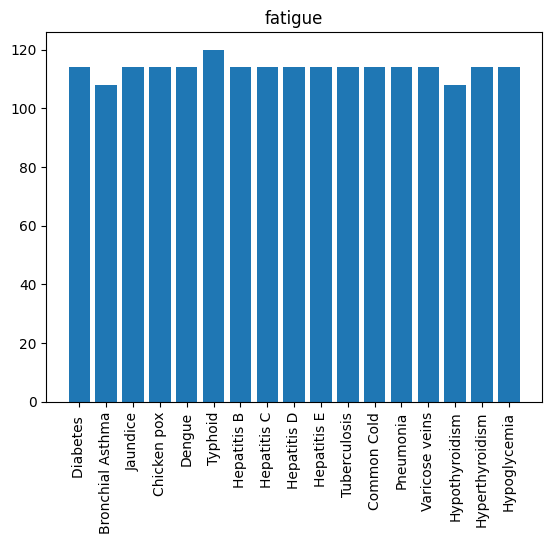

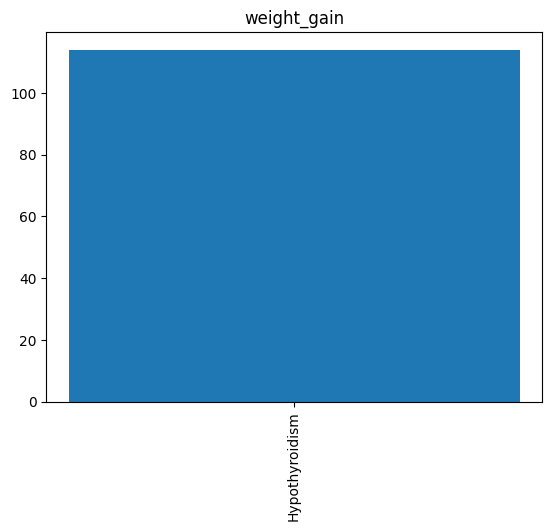

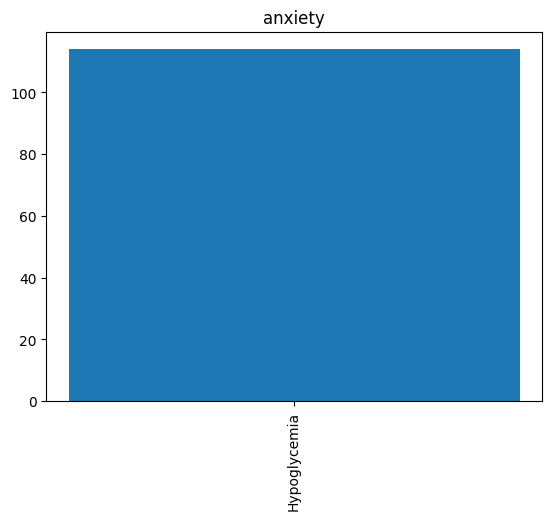

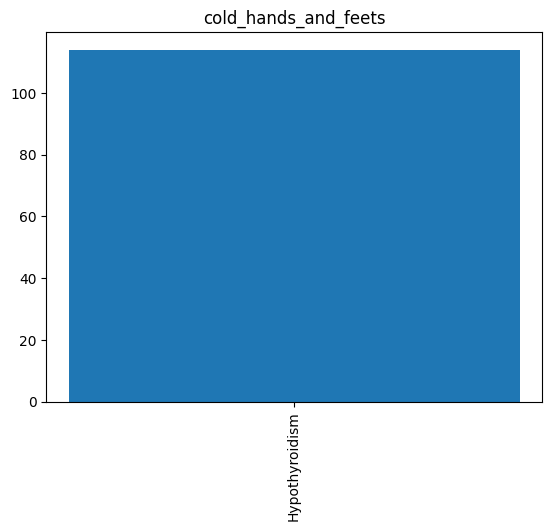

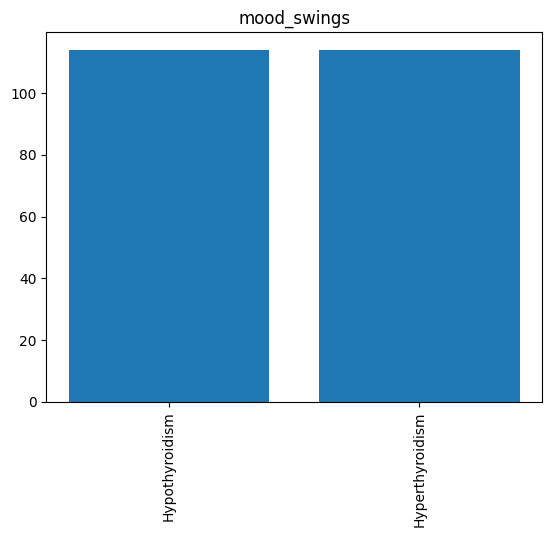

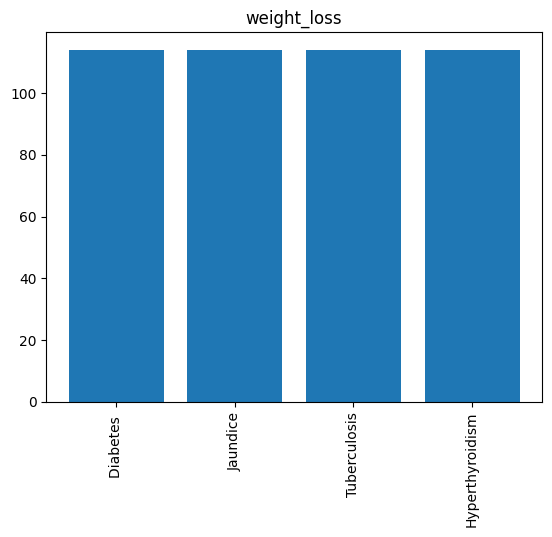

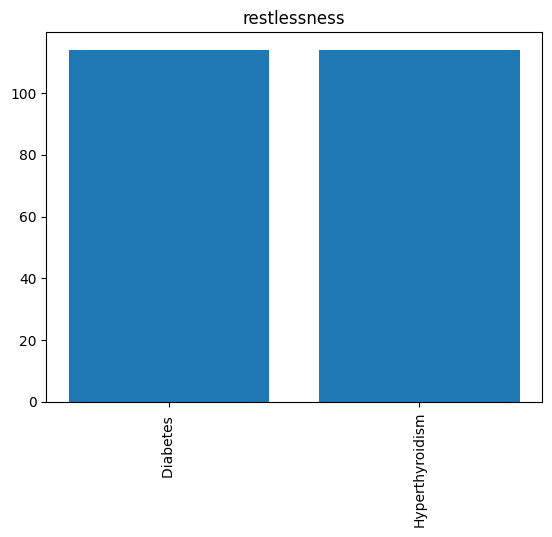

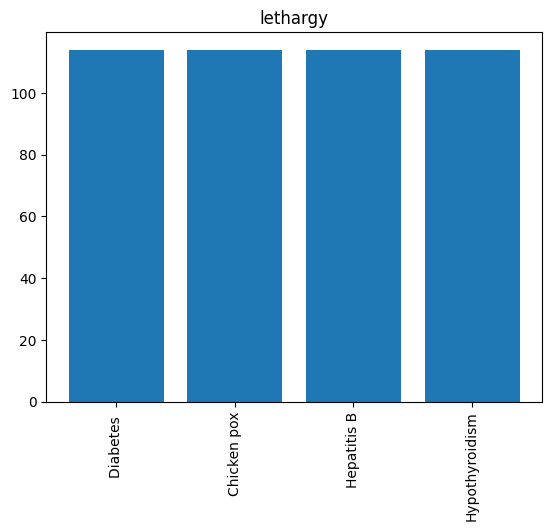

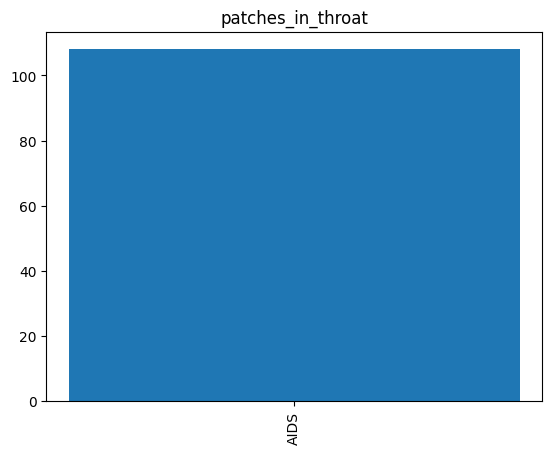

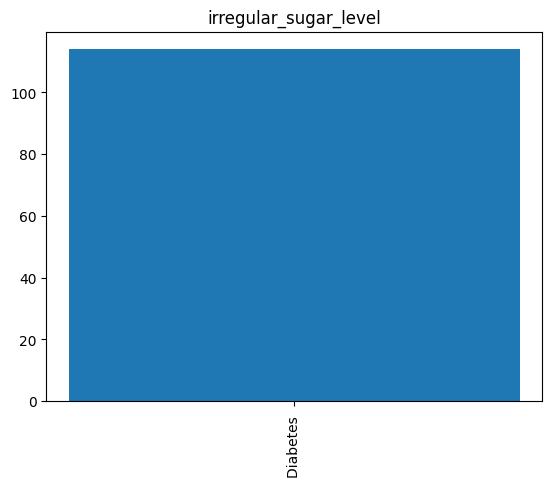

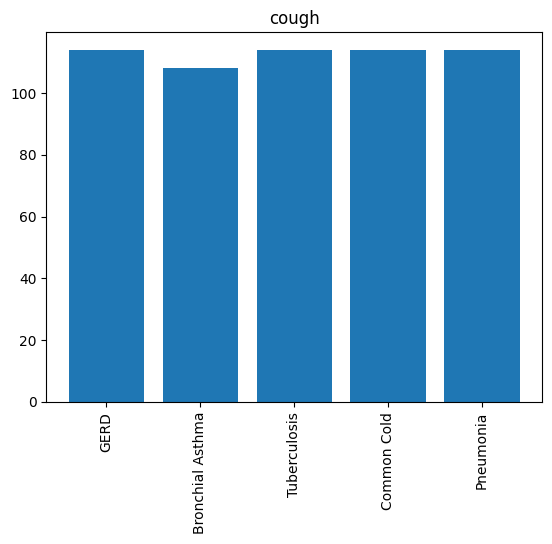

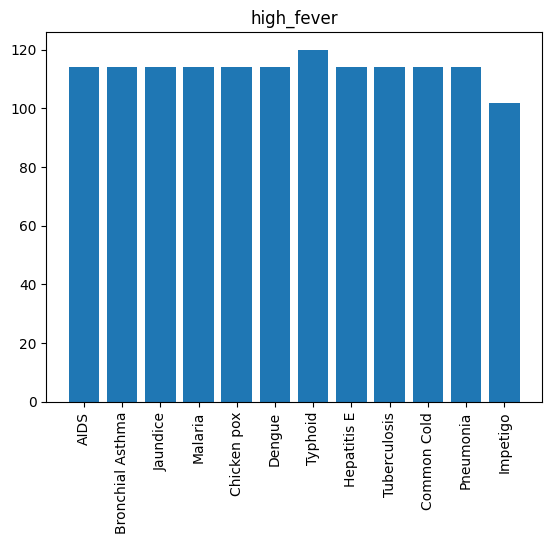

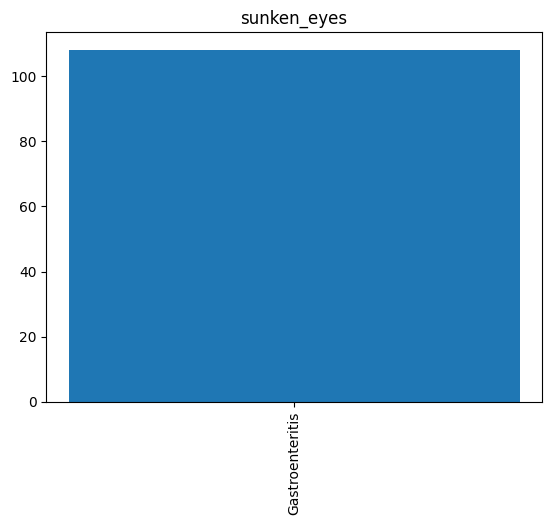

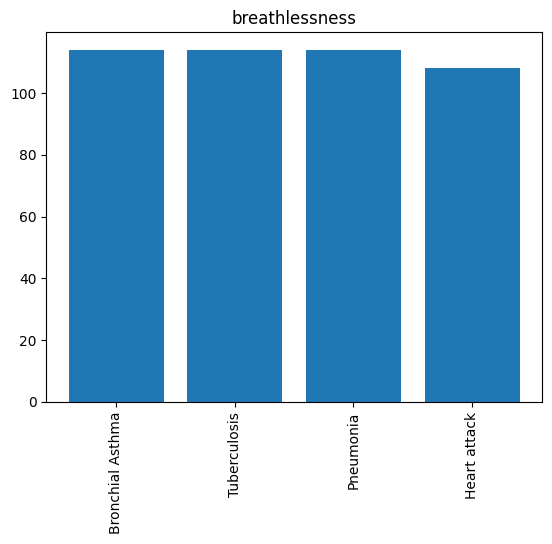

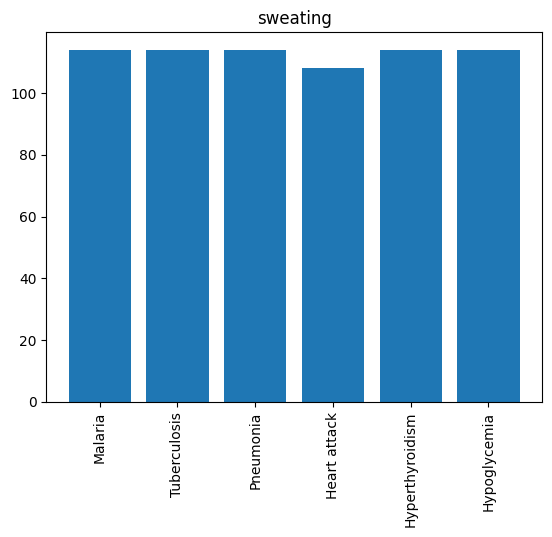

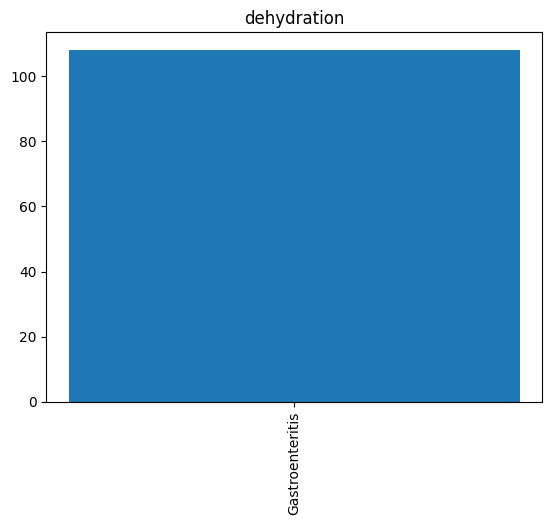

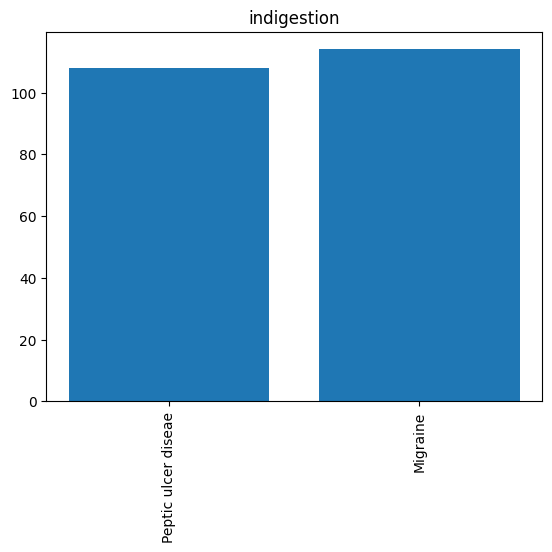

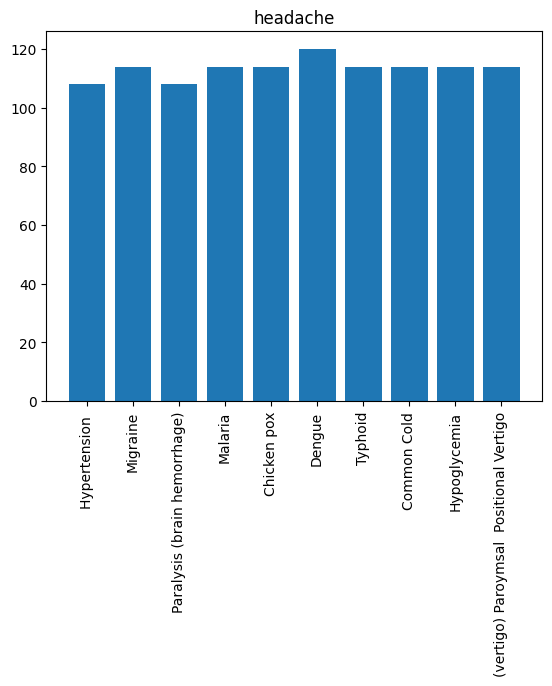

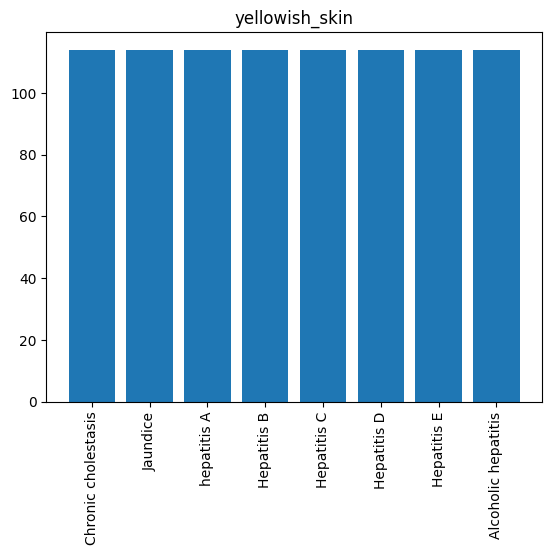

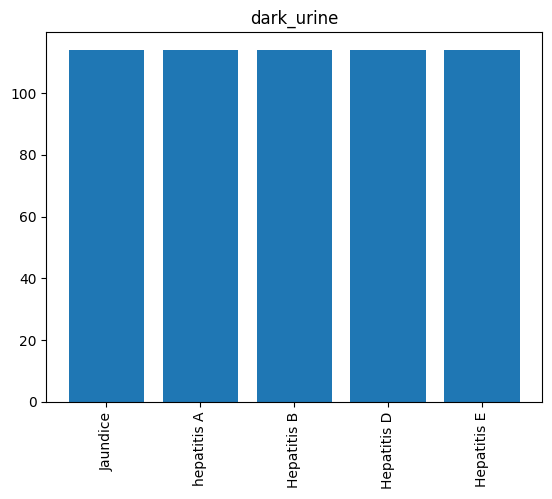

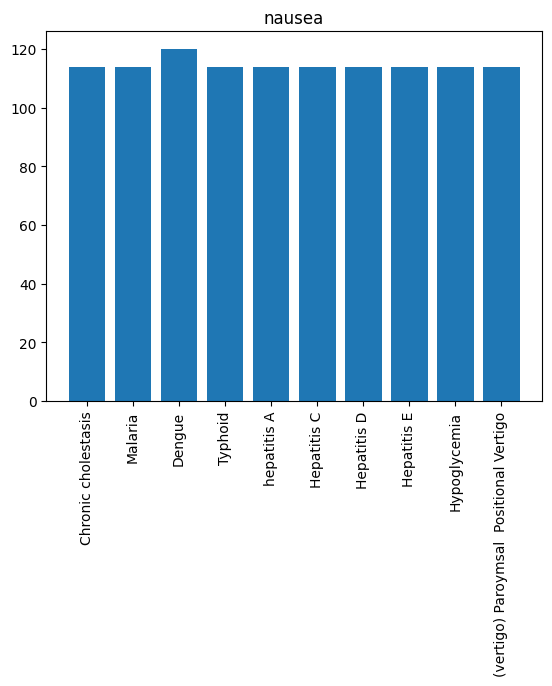

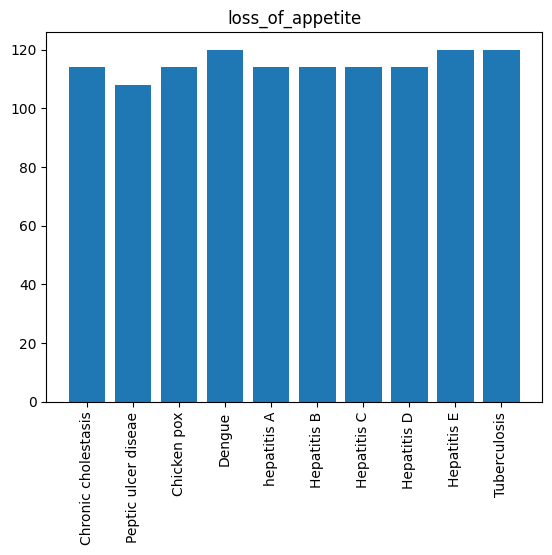

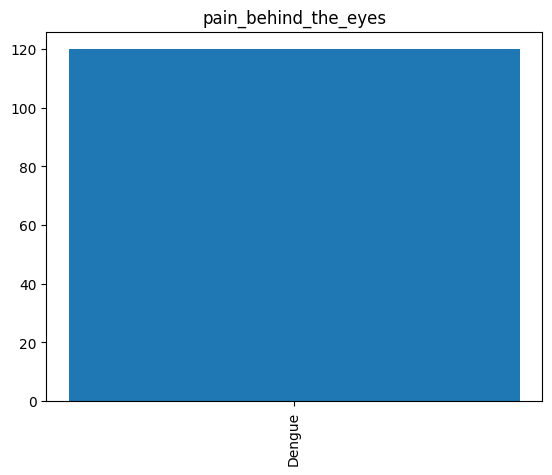

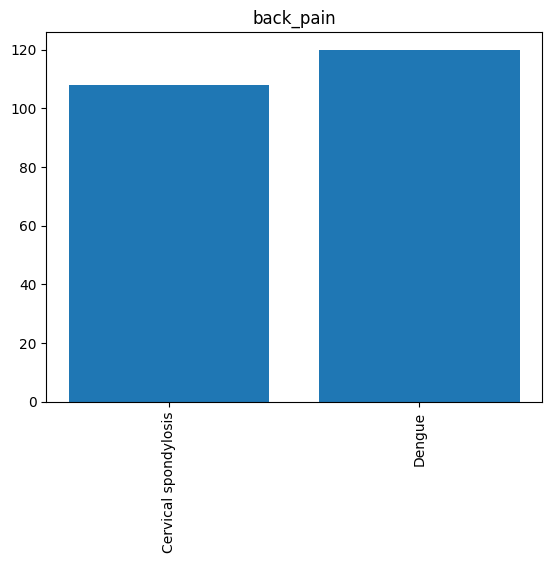

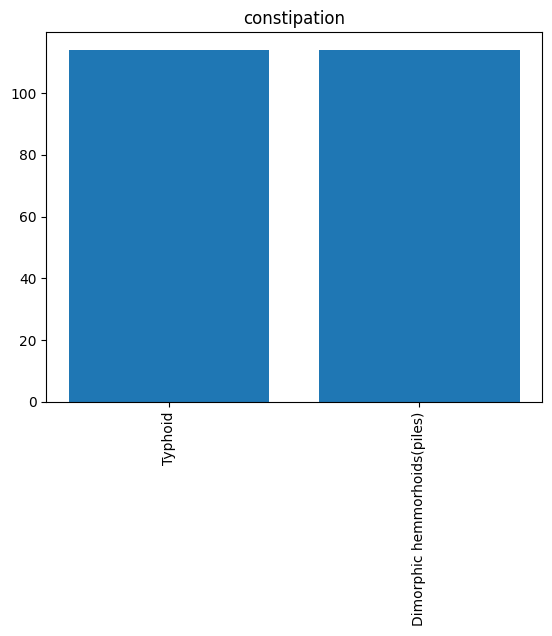

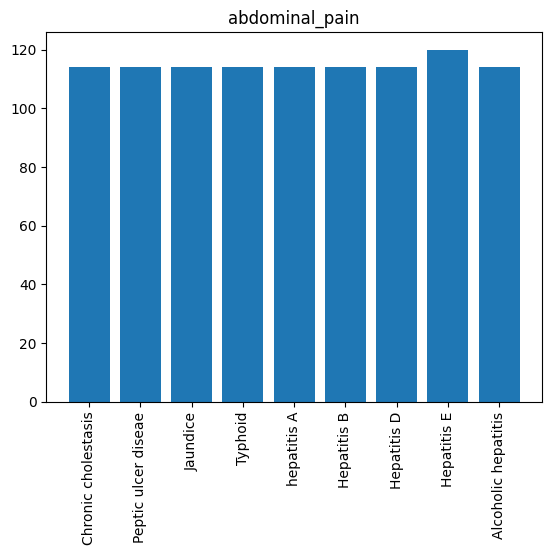

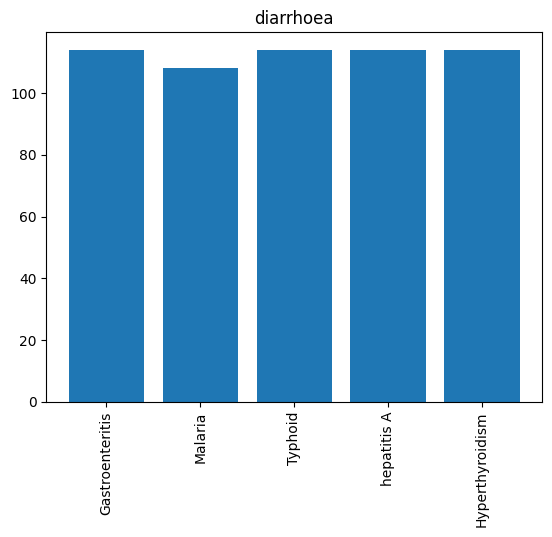

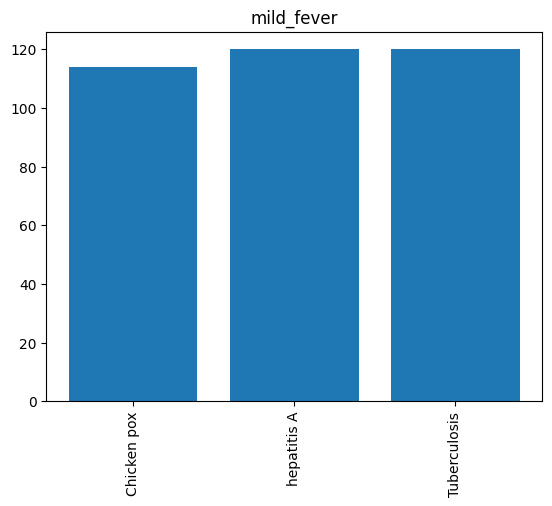

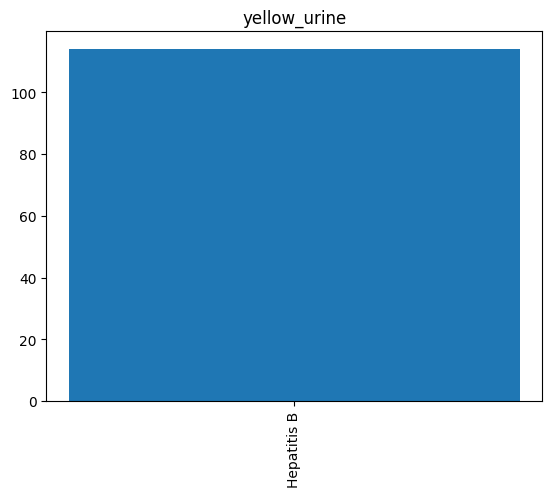

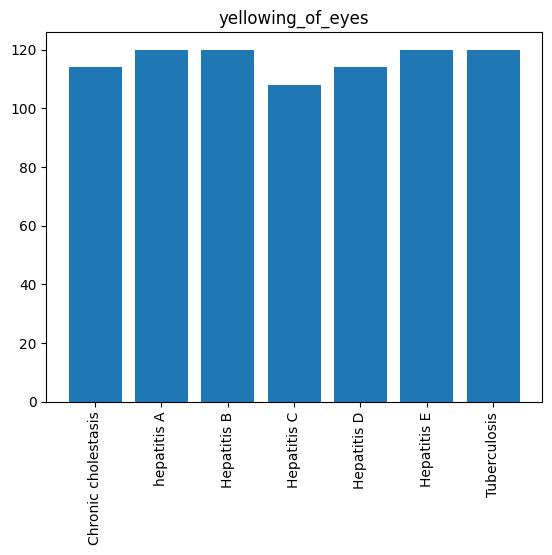

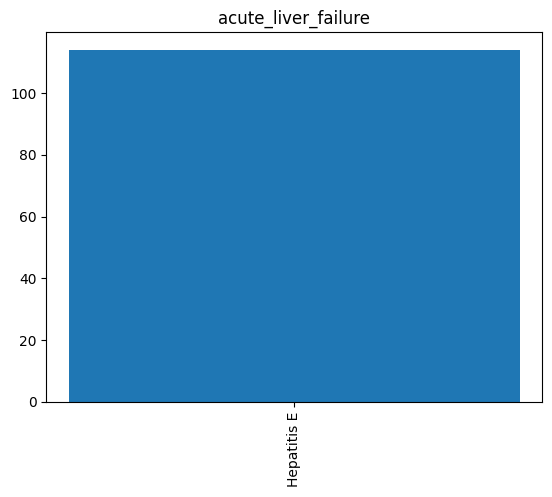

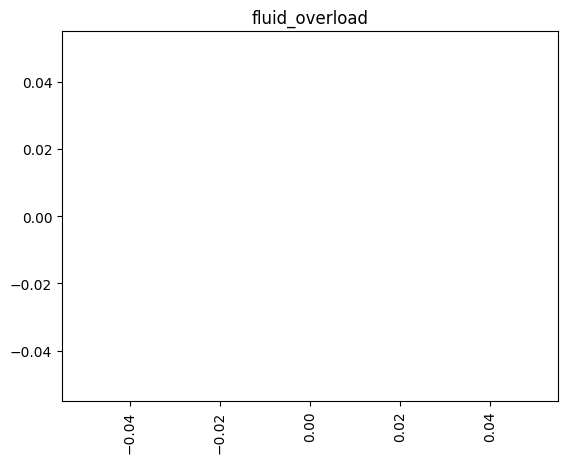

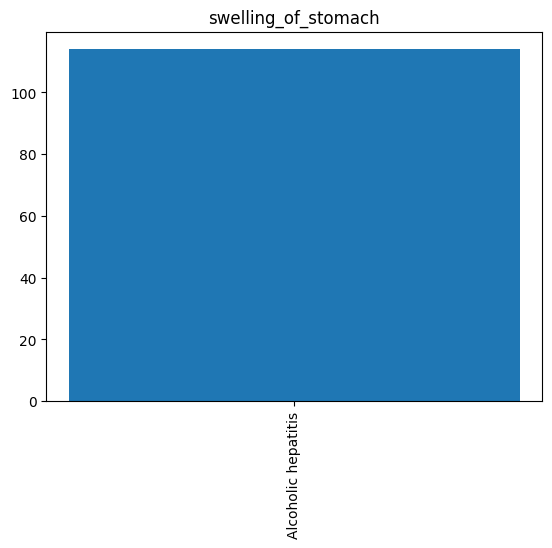

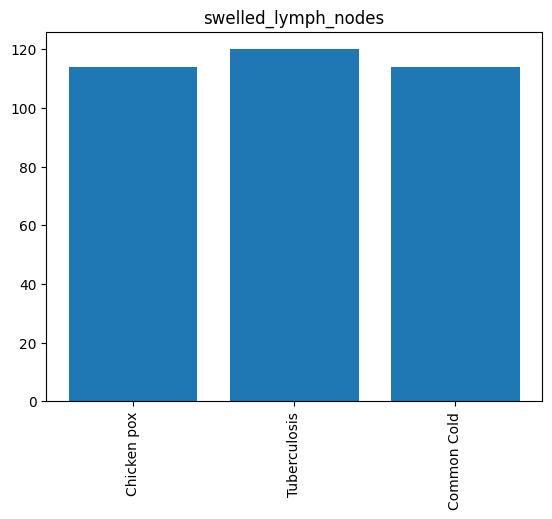

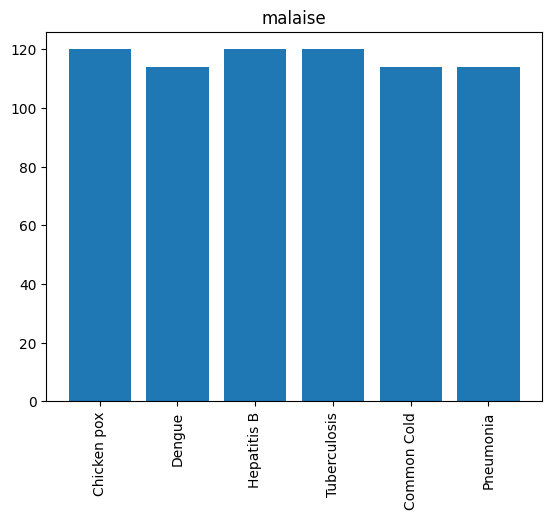

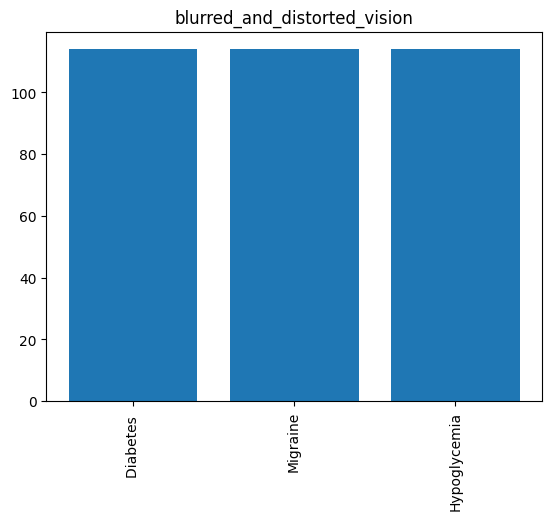

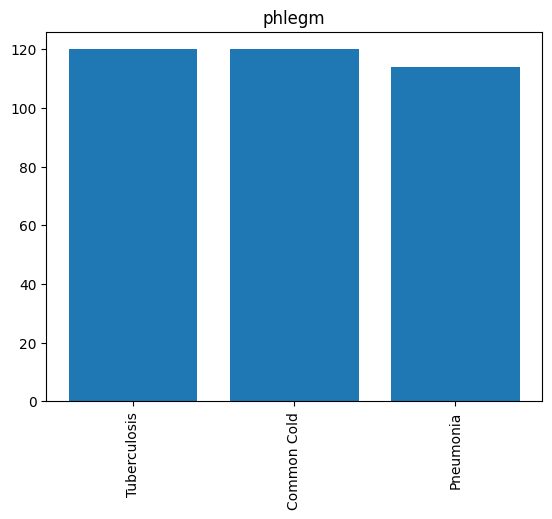

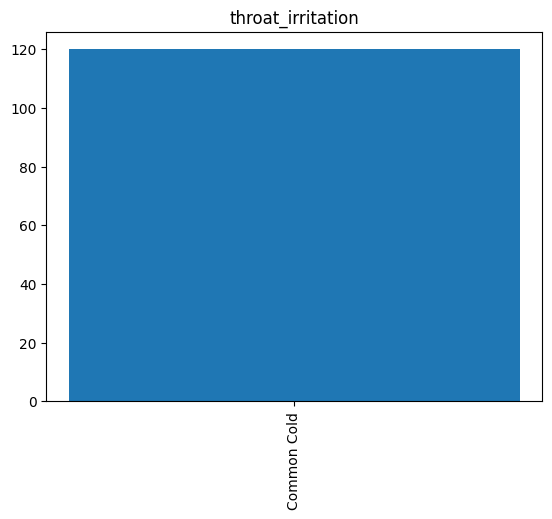

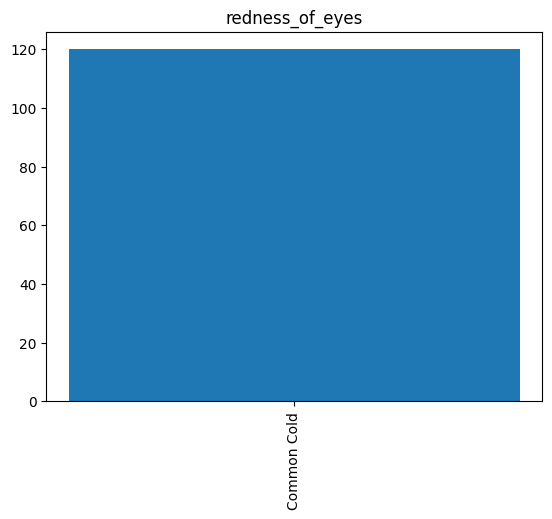

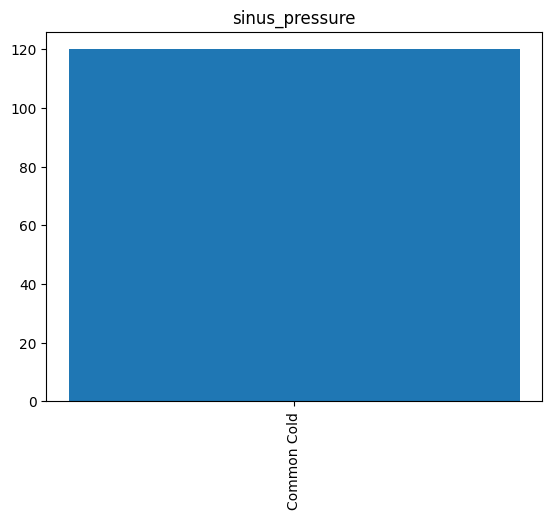

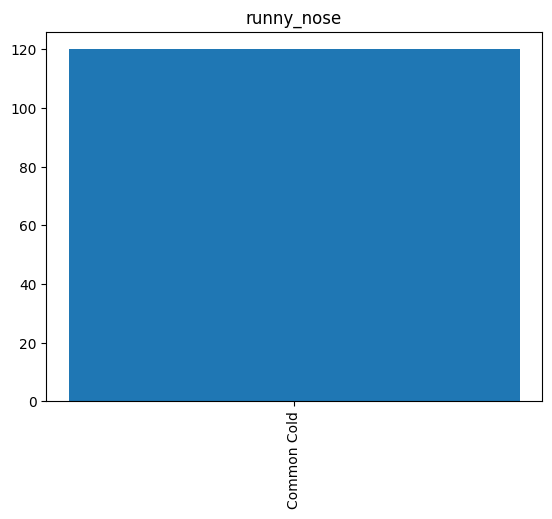

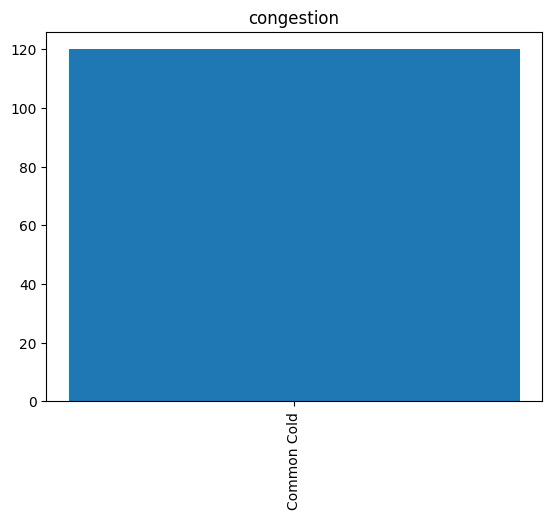

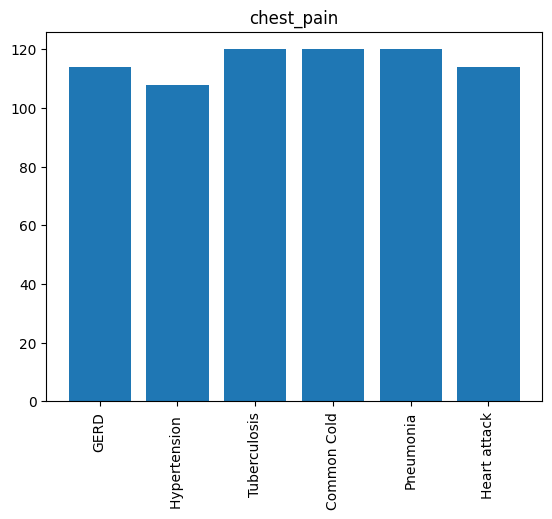

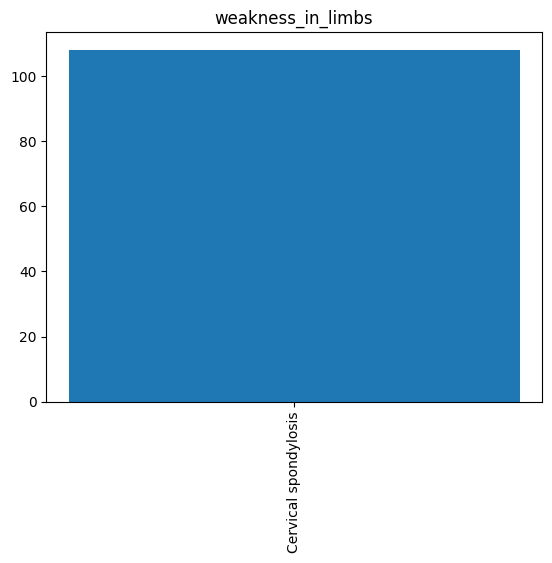

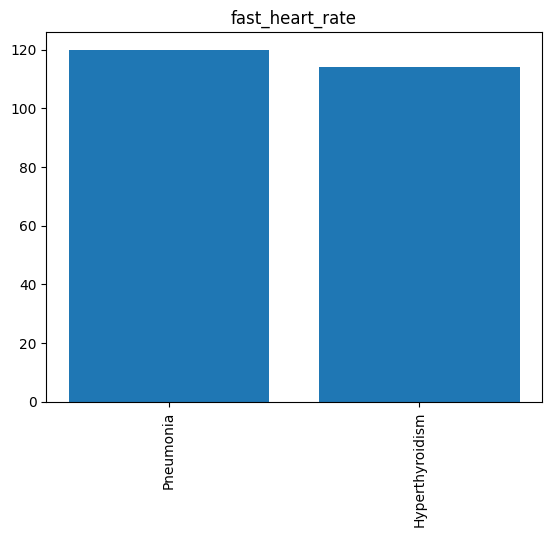

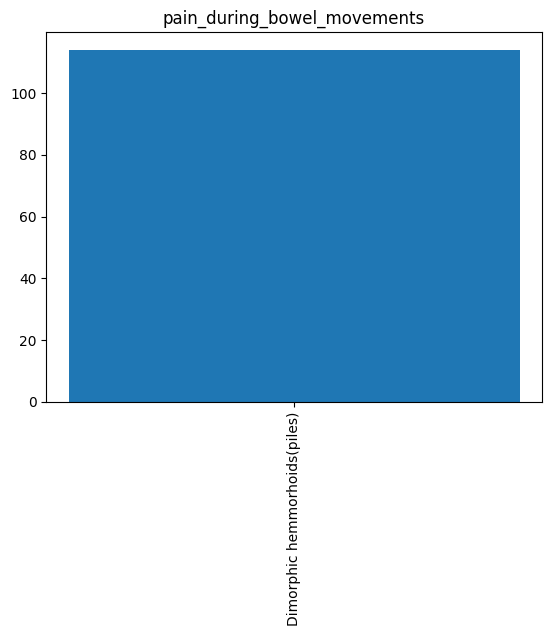

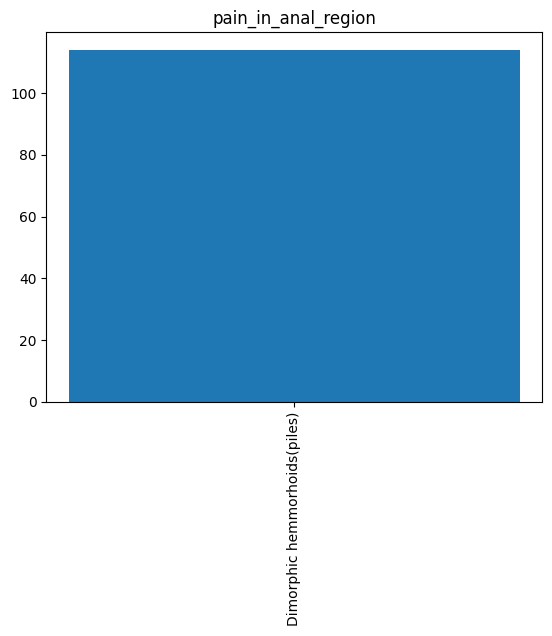

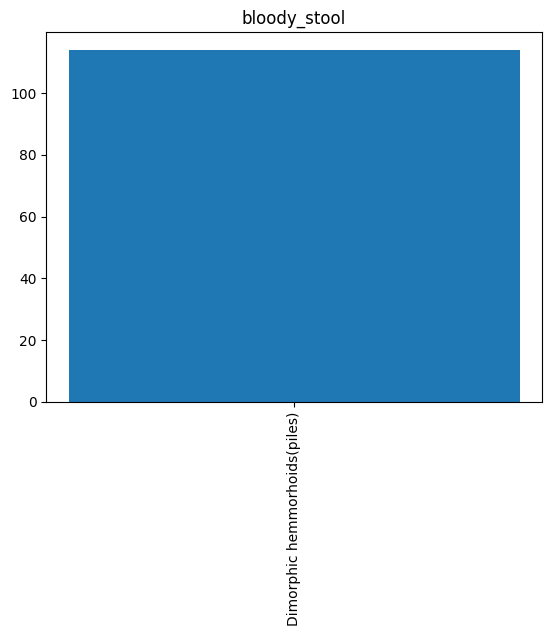

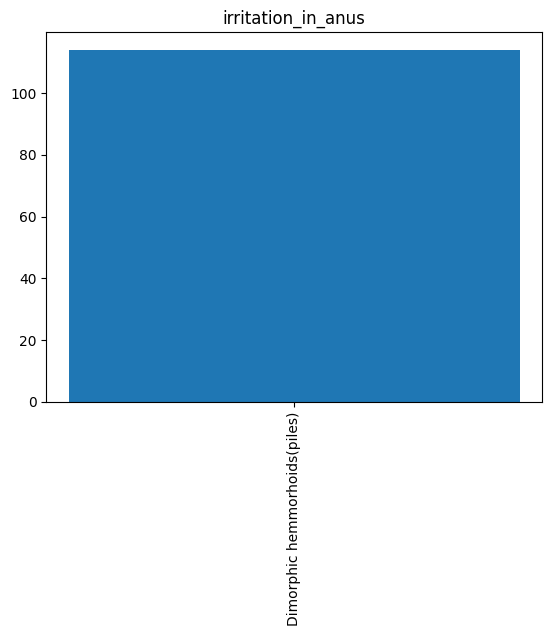

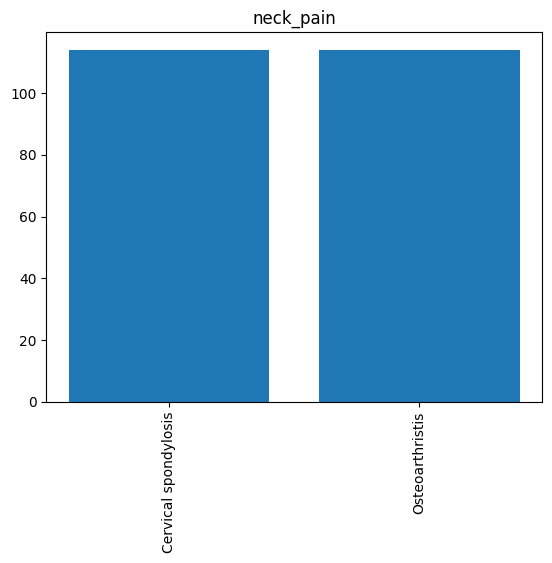

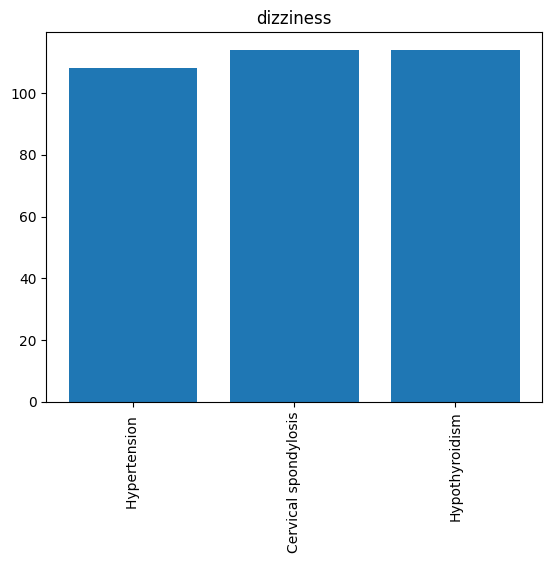

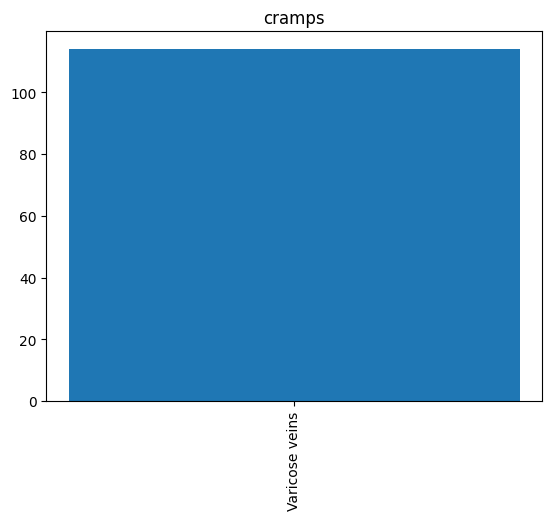

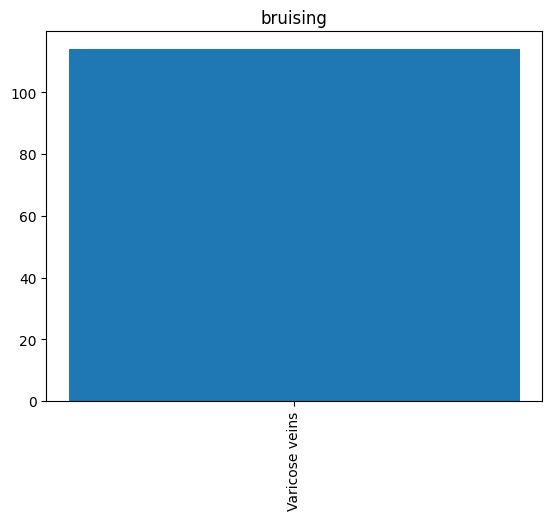

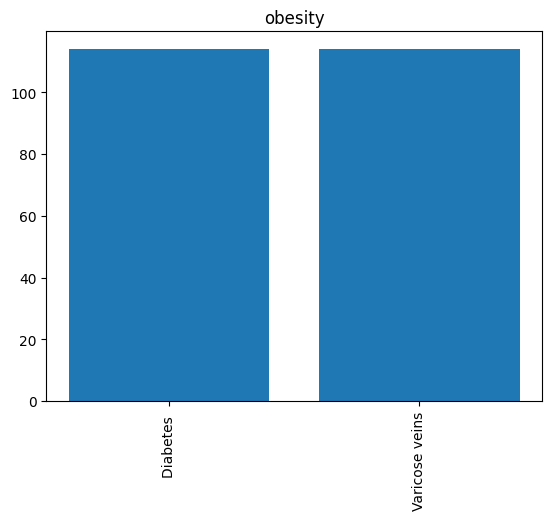

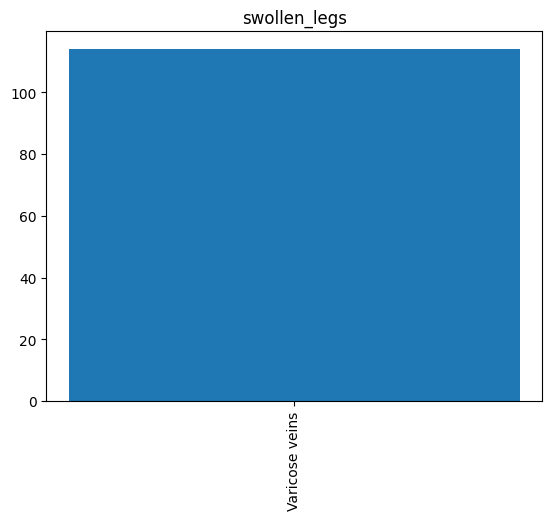

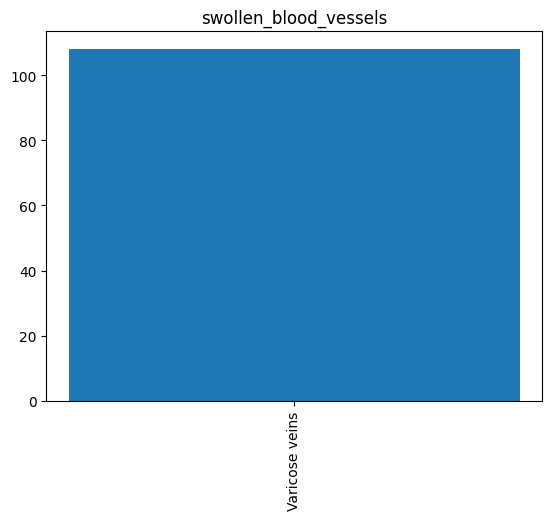

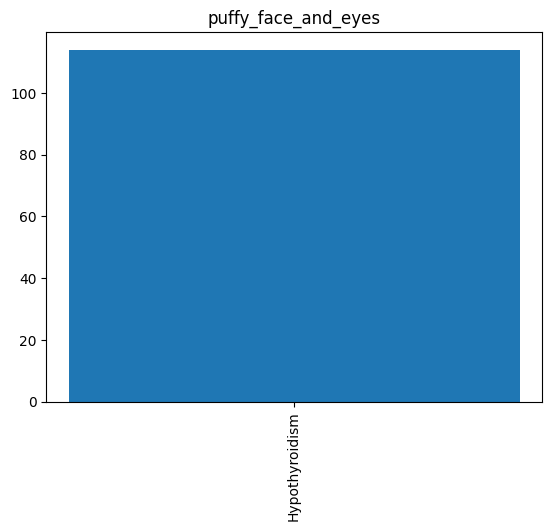

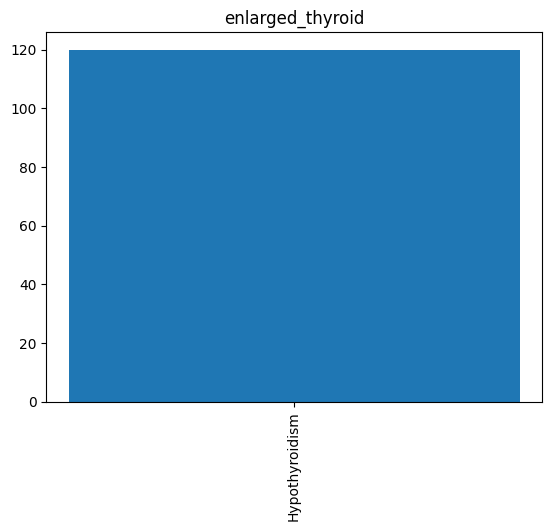

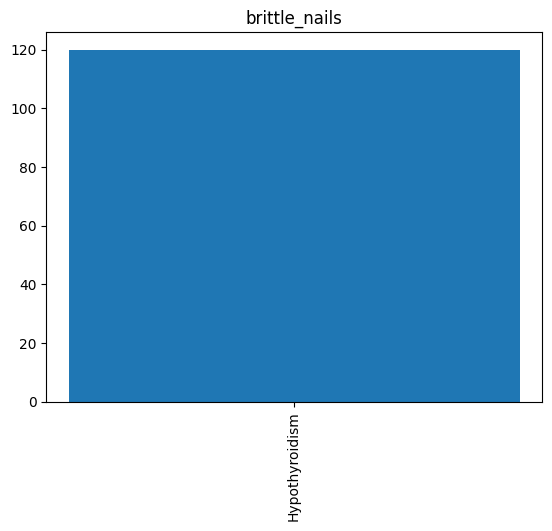

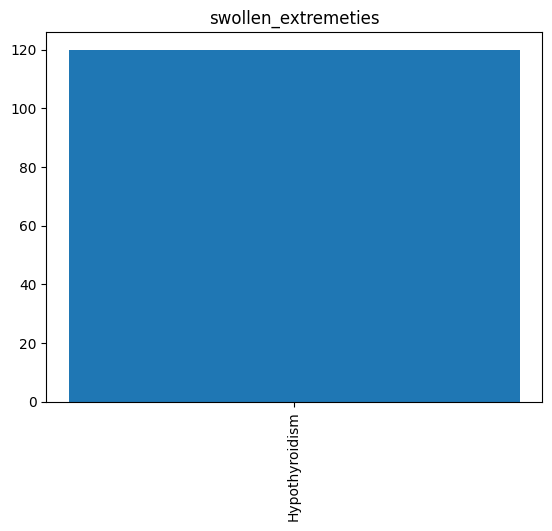

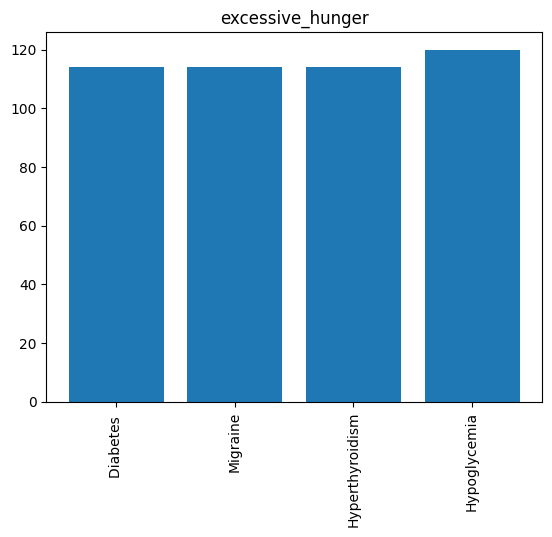

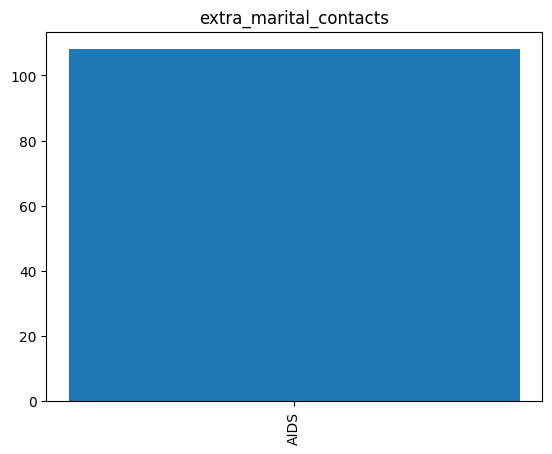

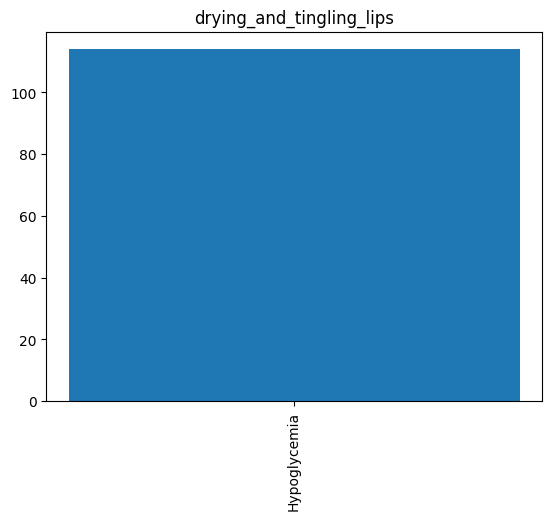

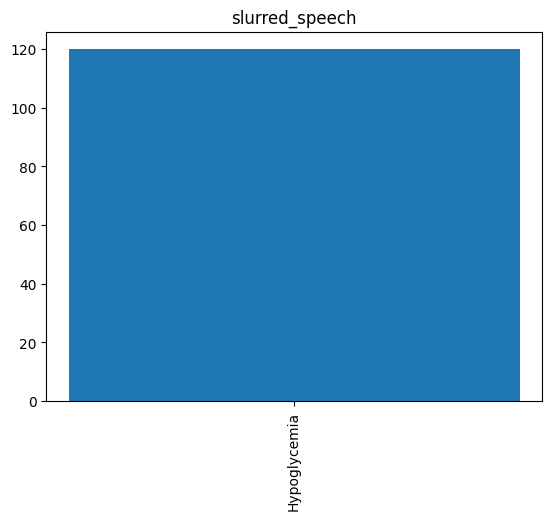

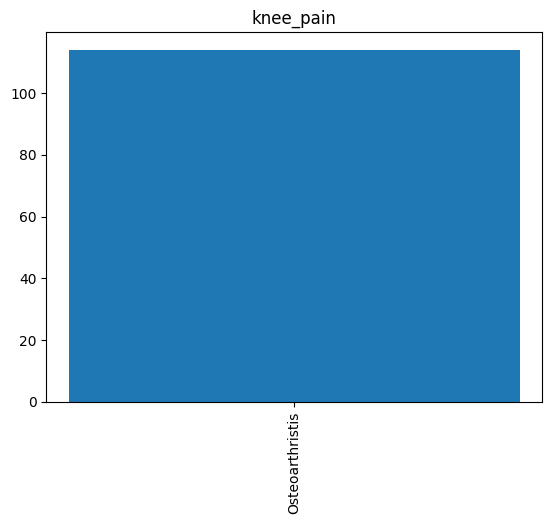

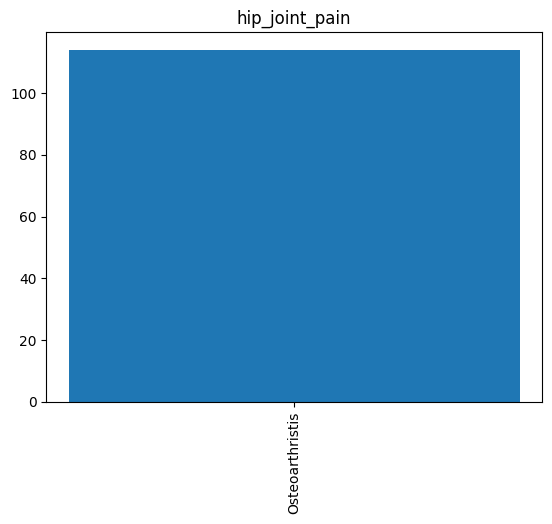

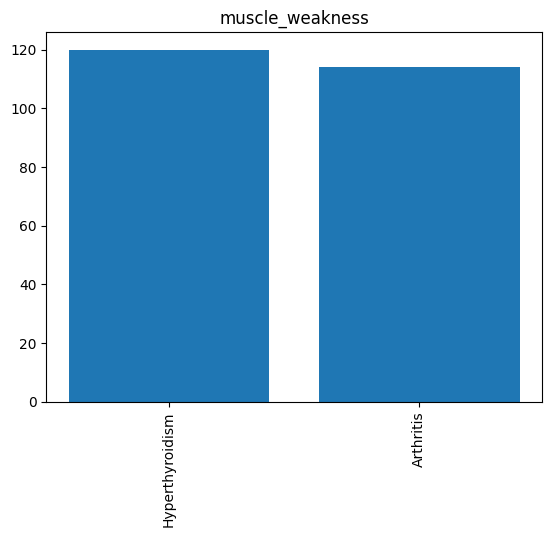

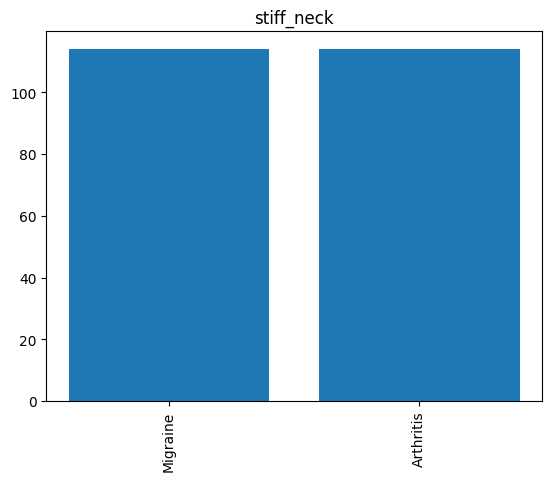

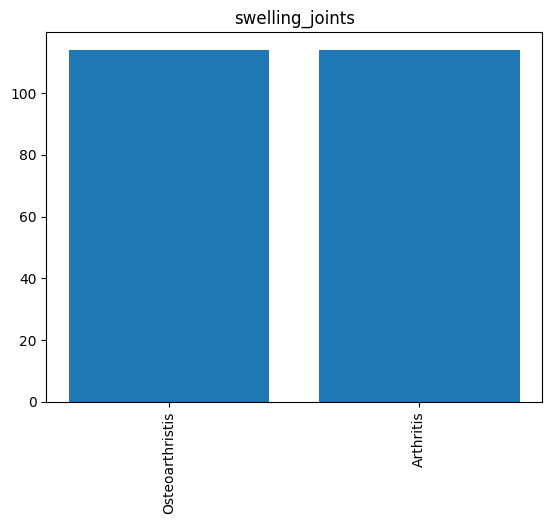

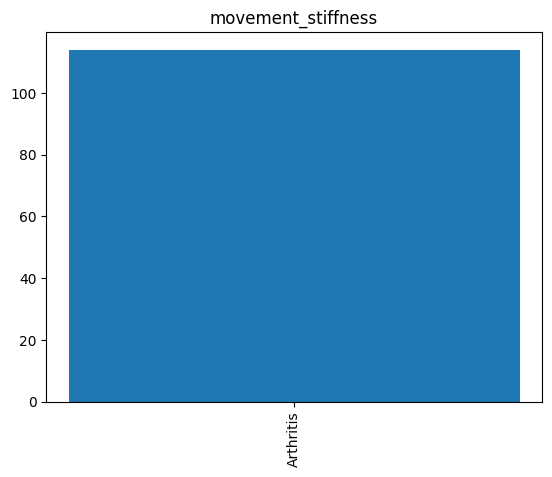

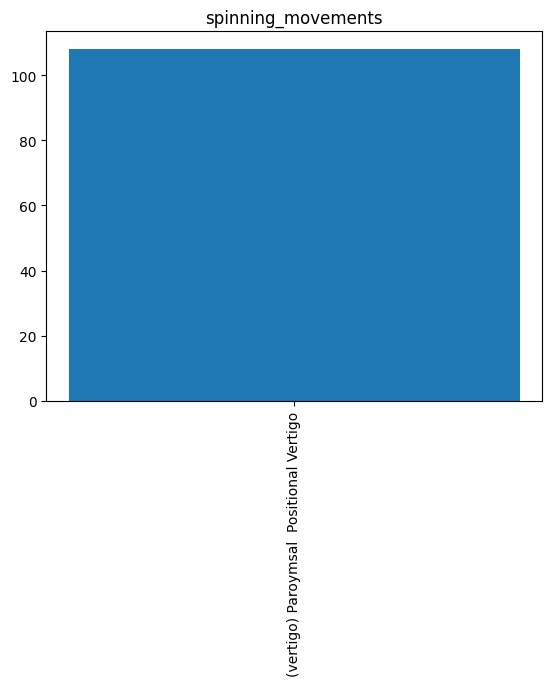

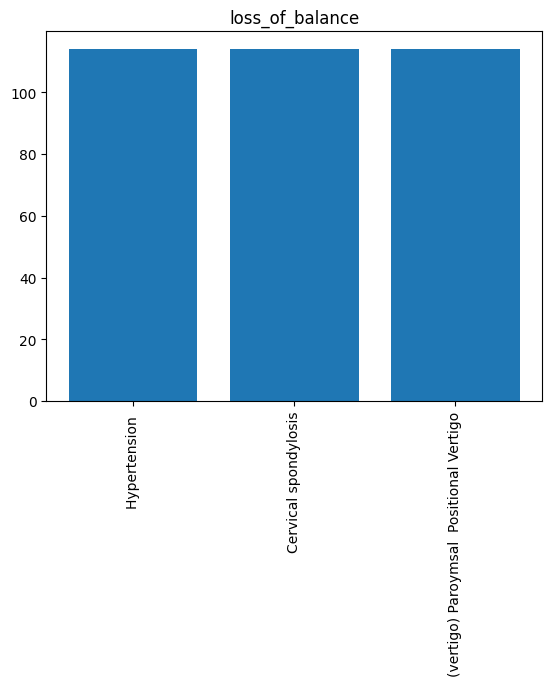

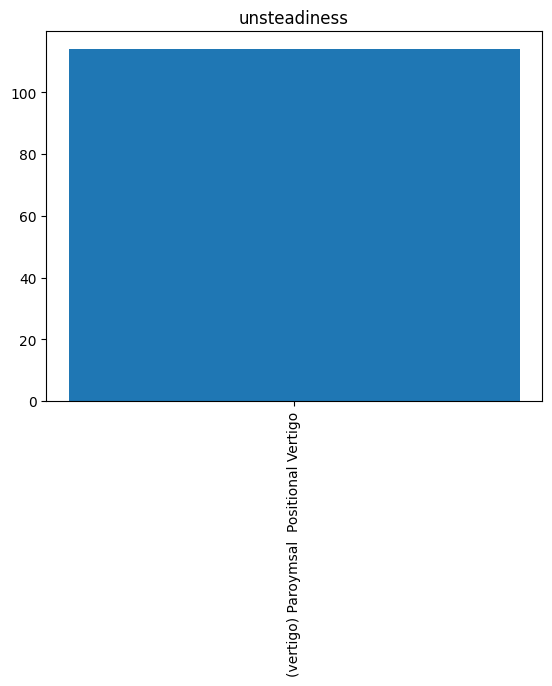

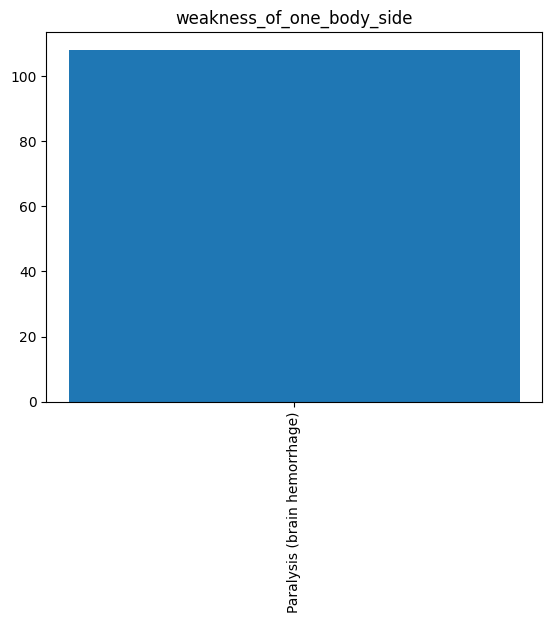

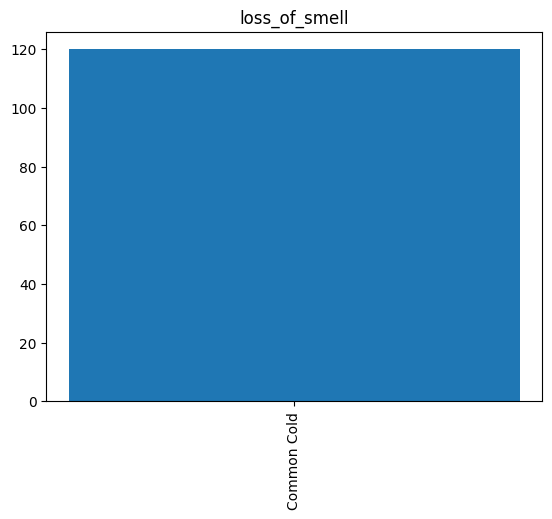

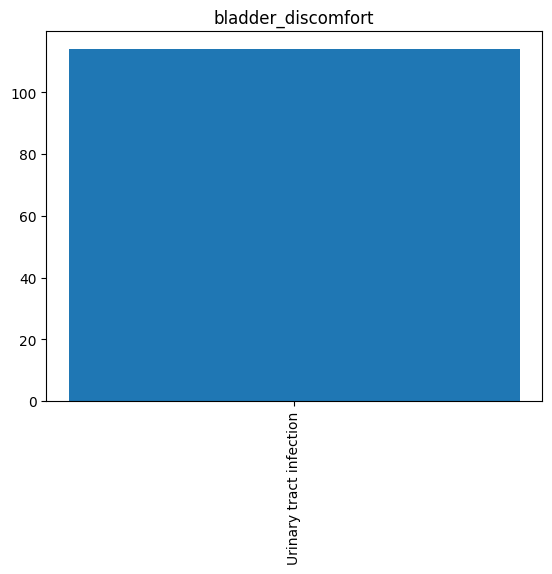

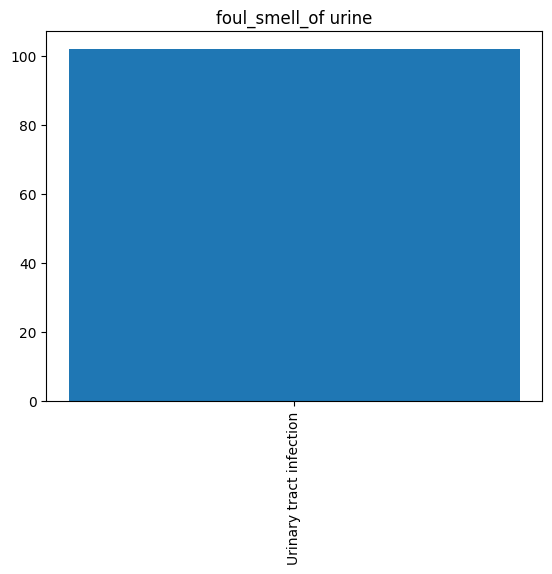

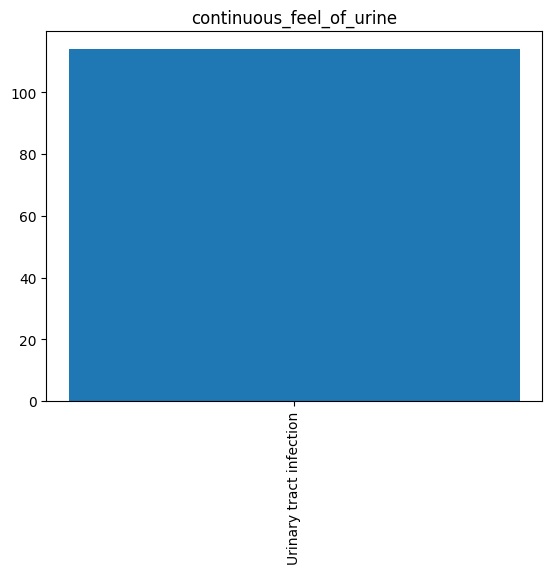

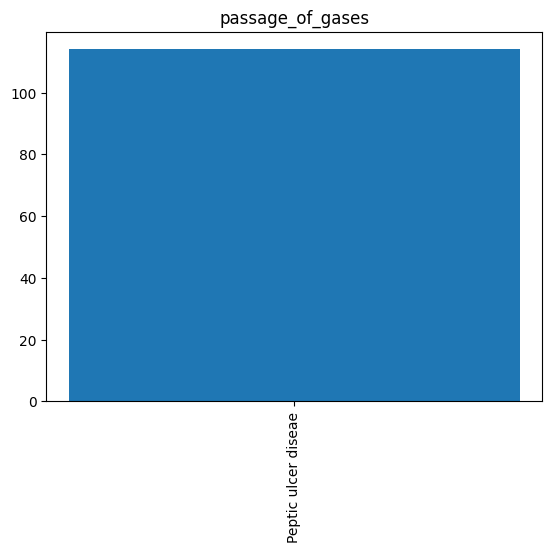

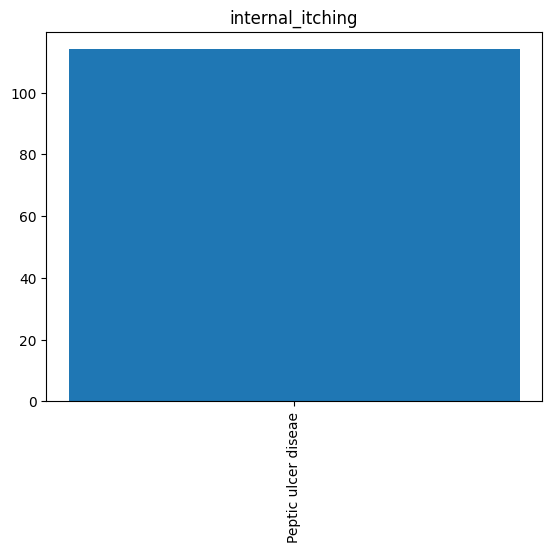

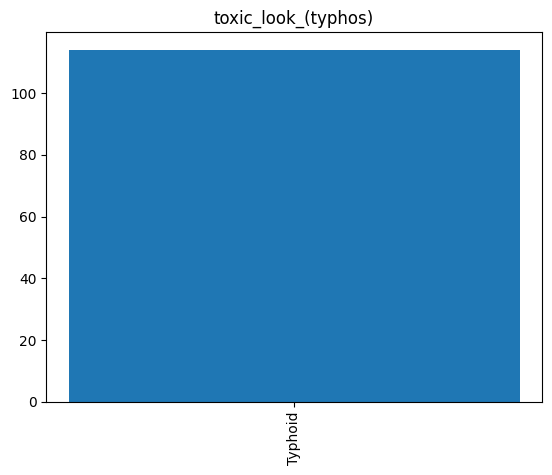

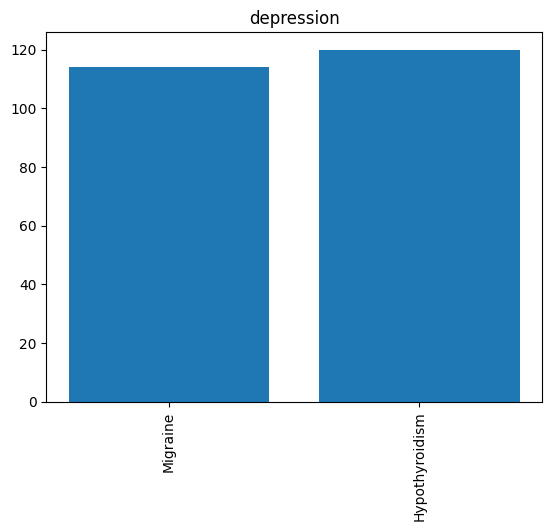

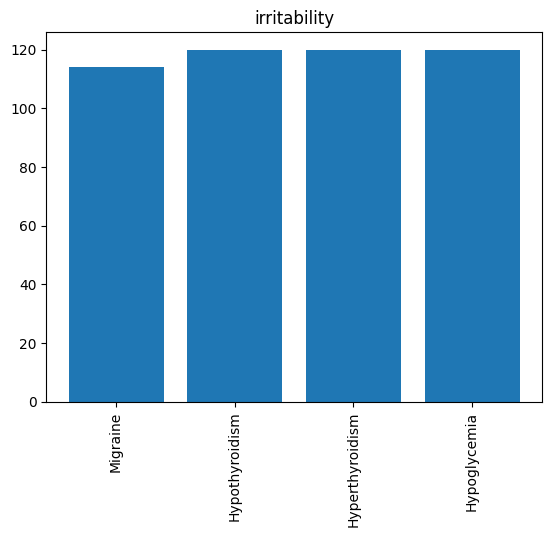

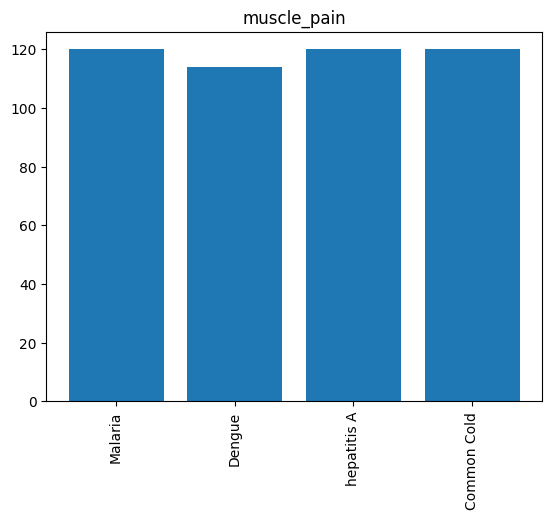

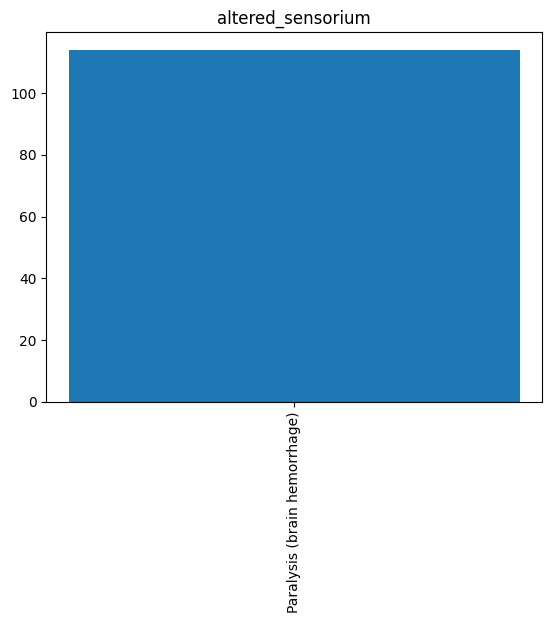

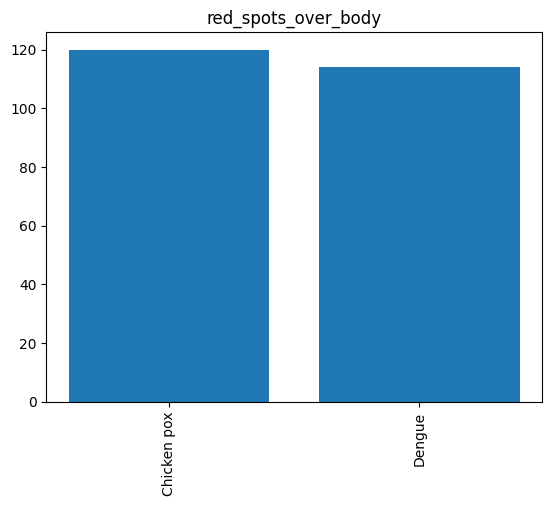

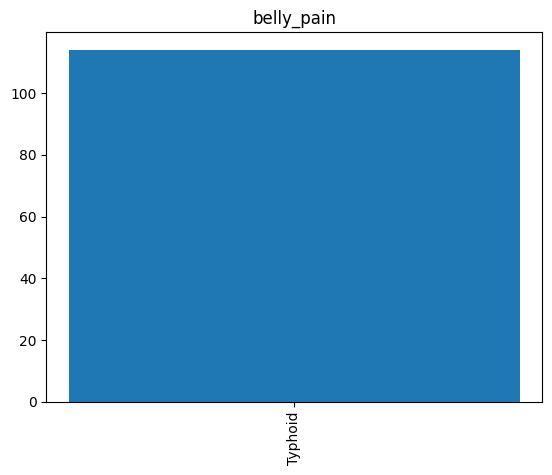

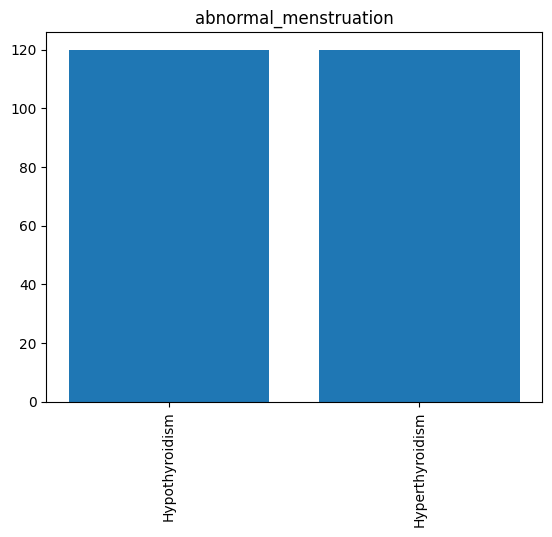

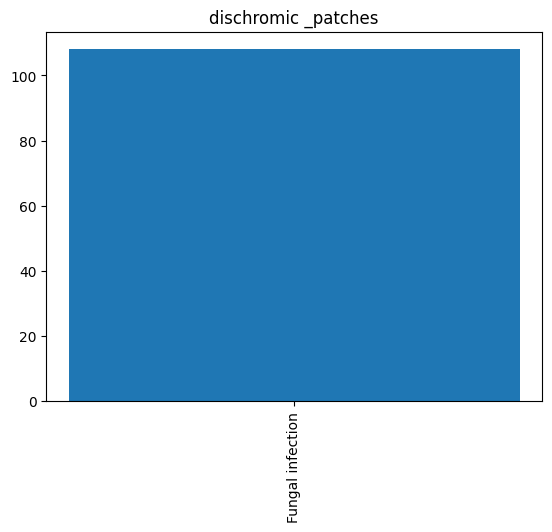

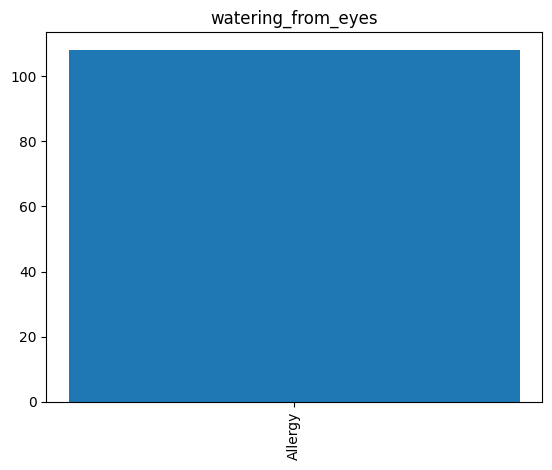

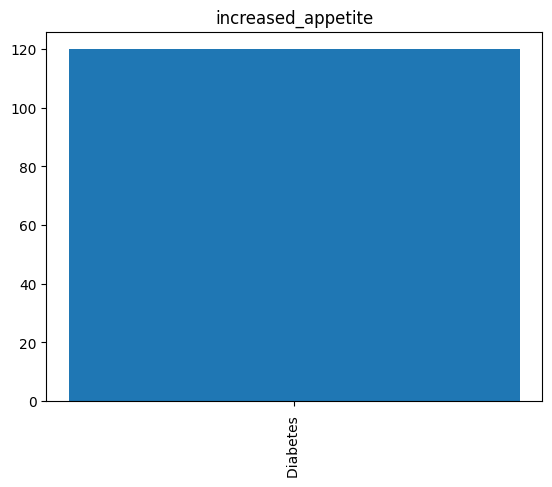

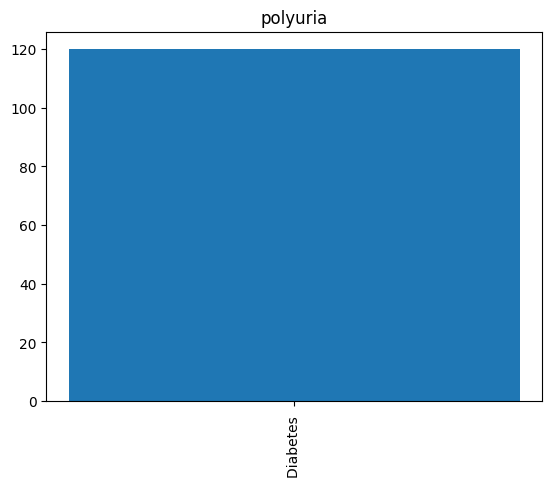

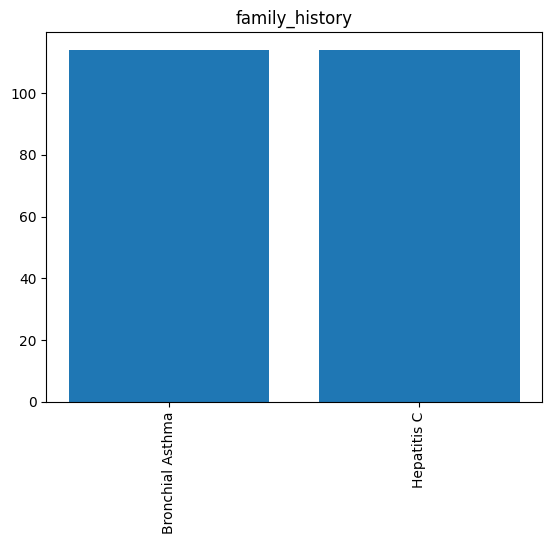

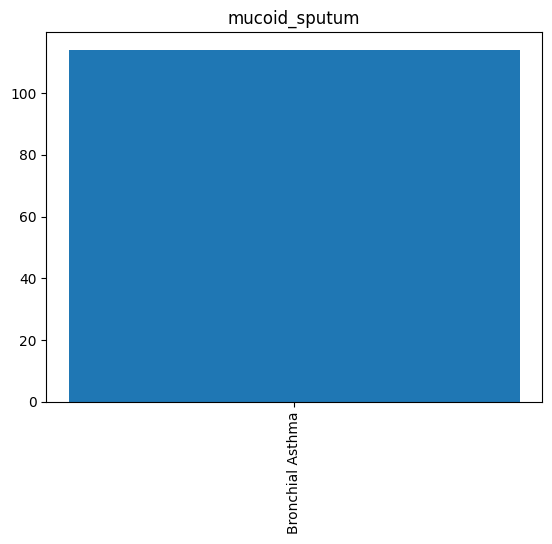

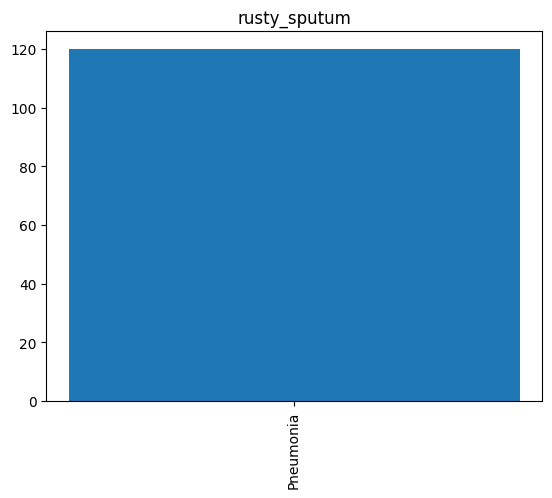

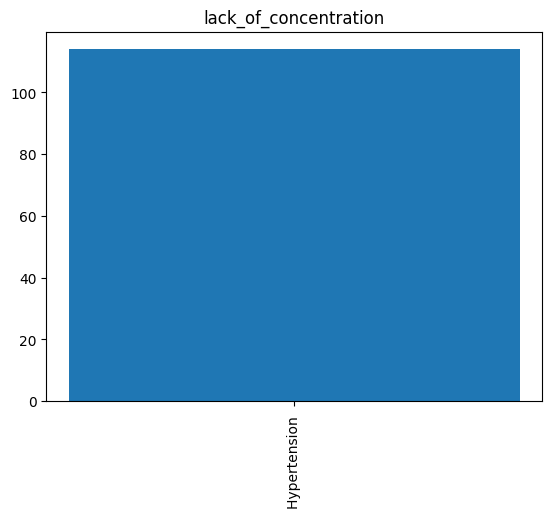

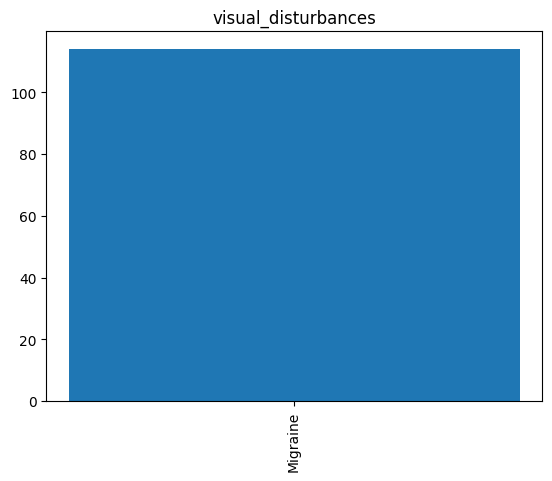

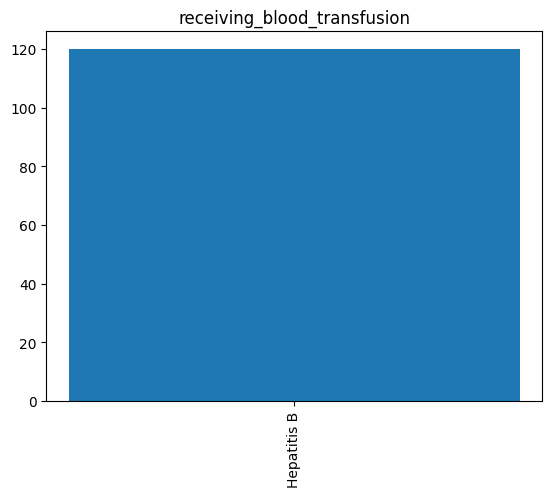

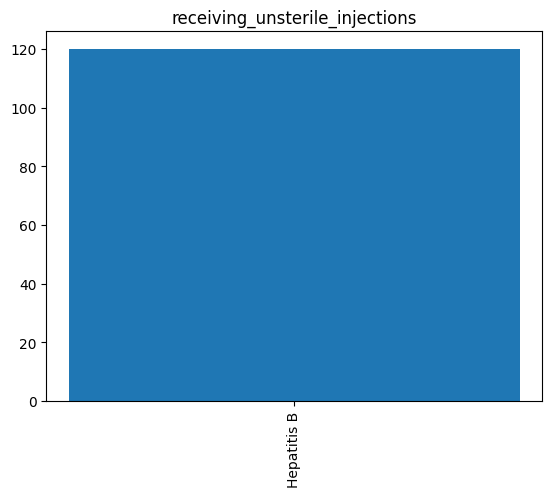

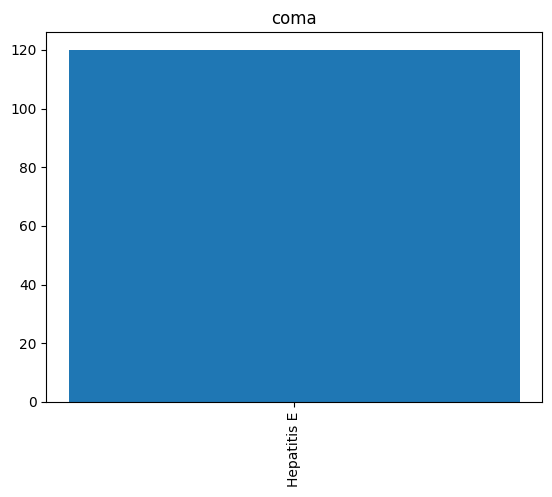

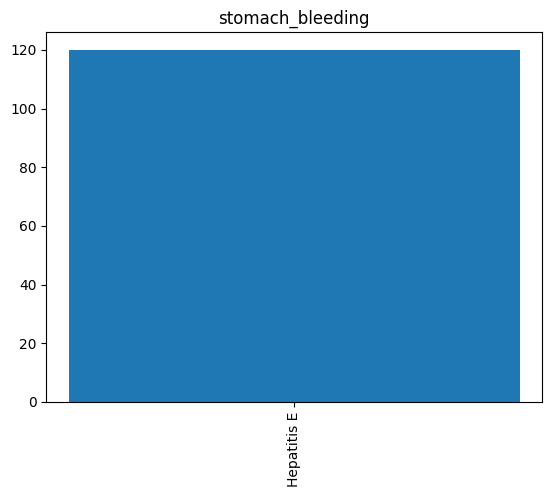

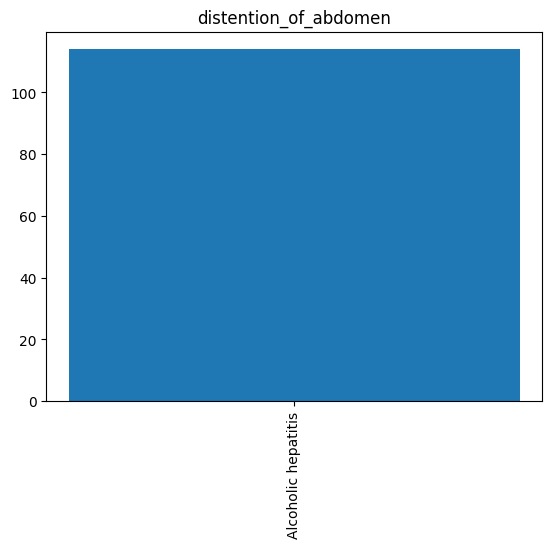

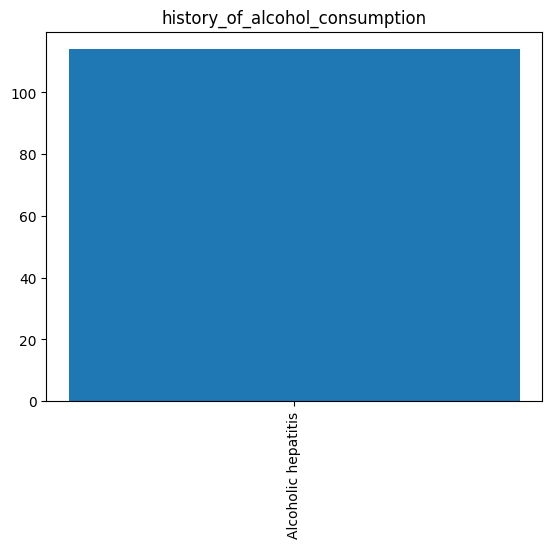

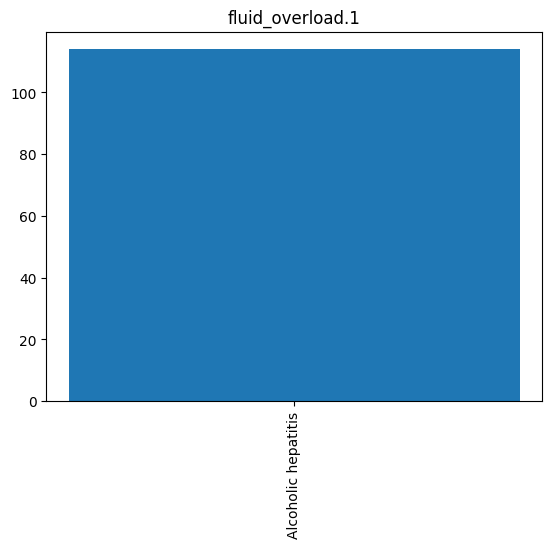

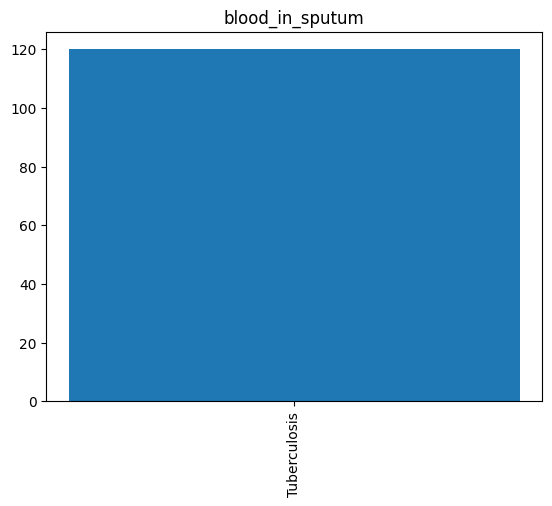

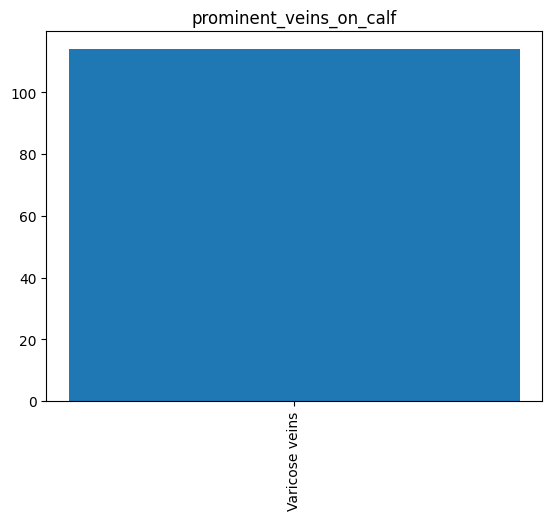

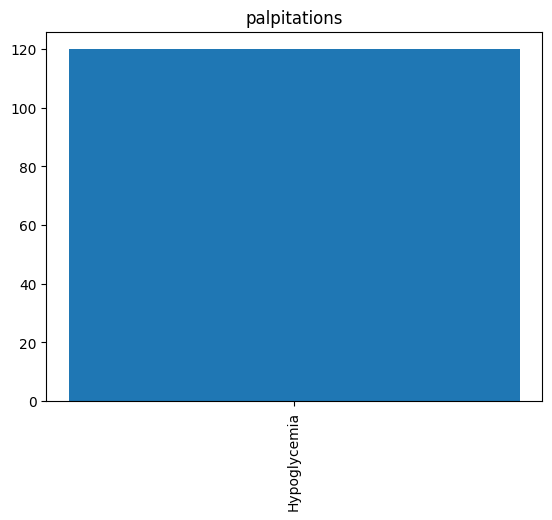

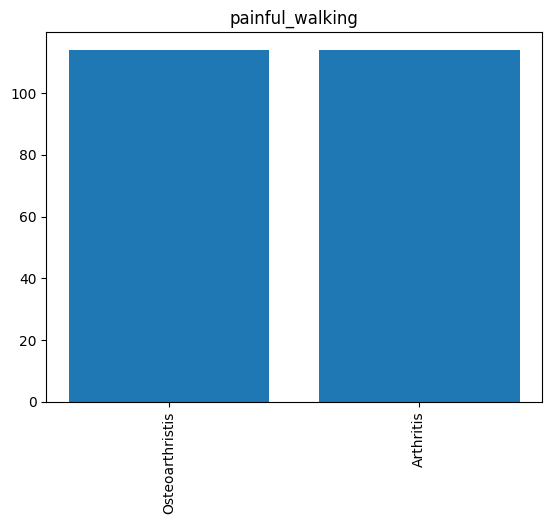

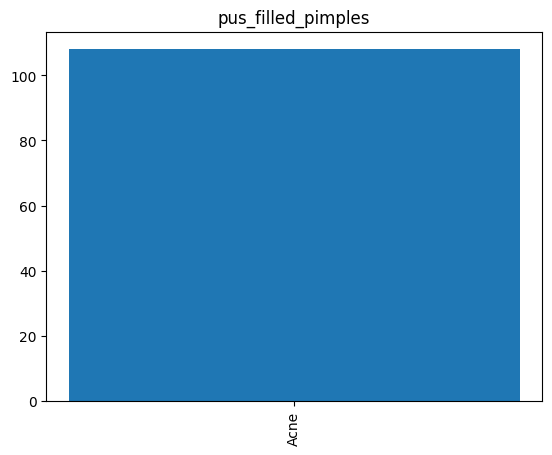

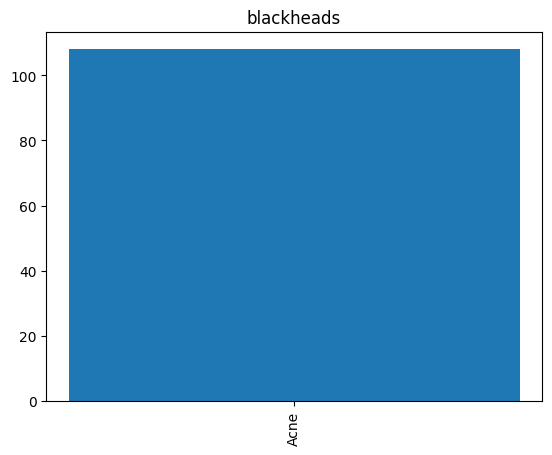

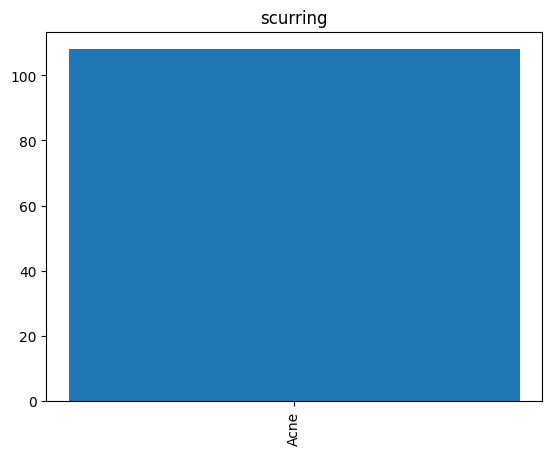

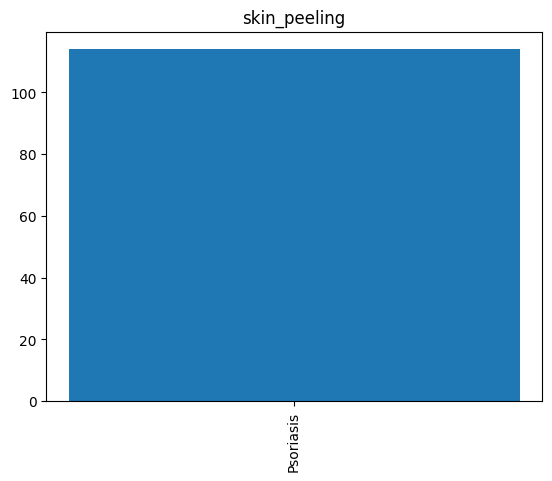

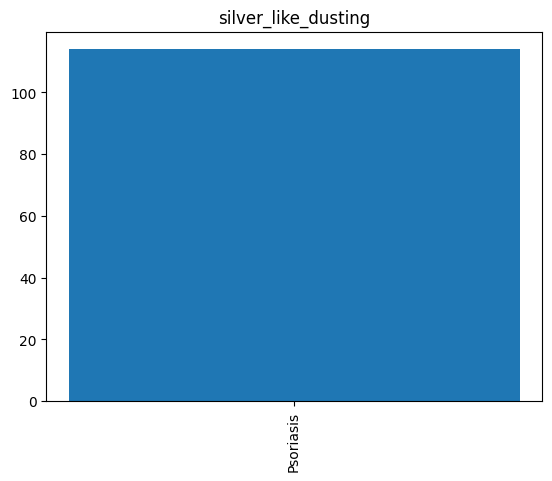

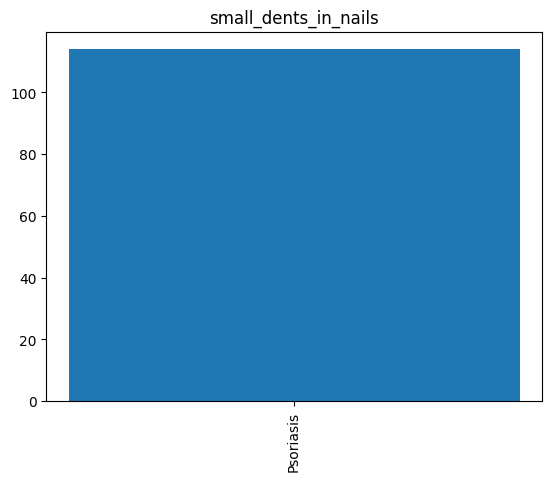

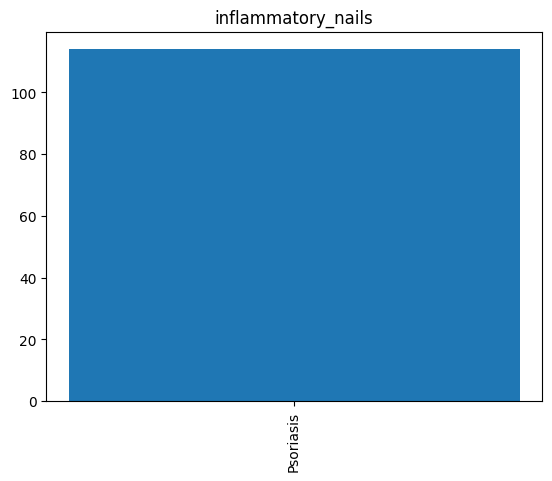

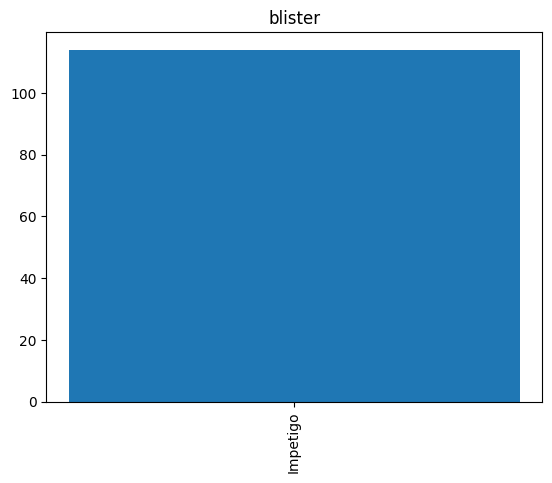

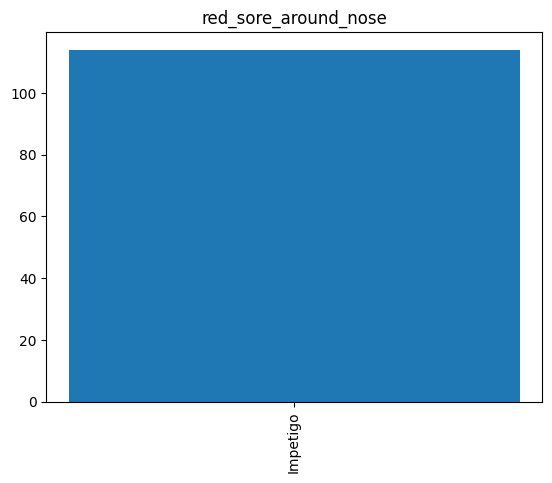

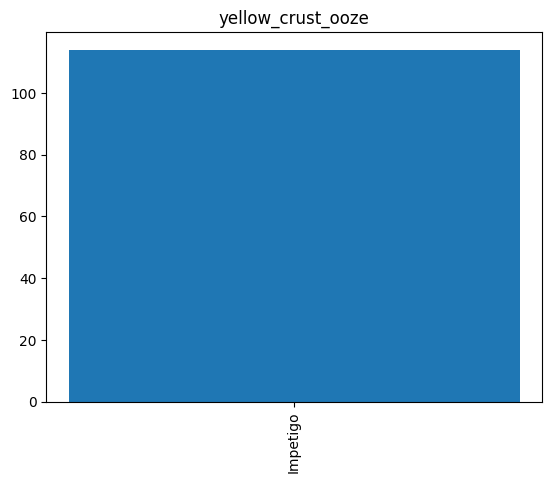

In [40]:

for symptom in data.columns[:-1]:
    sym = data[data[symptom]==1]
    sym_diseases = sym["prognosis"].unique()
    # print(itching_diseases)
    x = sym_diseases
    y = [len(sym[sym["prognosis"]==k]) for k in sym_diseases]
    plt.xticks(rotation=90)
    plt.bar(x,y)
    plt.title(symptom)
    plt.show()

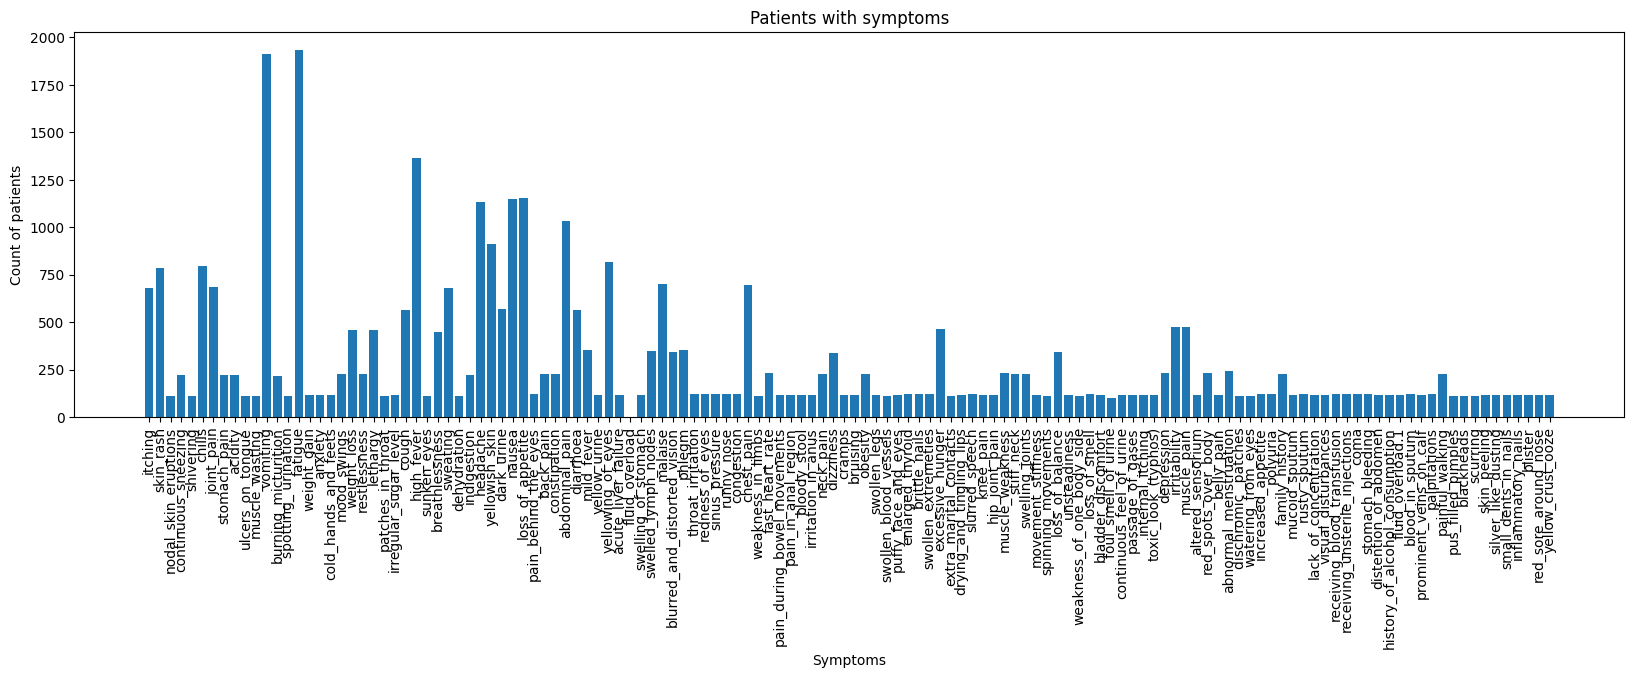

In [64]:
symptom=[x for x in data.columns[:-1]]
# print(len(symptom))
patients = [ sum(data[x]) for x in data.columns[:-1]]
# print(patients)
plt.figure(figsize=(20,5))
plt.bar(symptom,patients)
plt.xticks(rotation=90)
plt.xlabel("Symptoms")
plt.ylabel("Count of patients")
plt.title("Patients with symptoms")
plt.savefig("Patients with symptoms.png")
plt.show()
# for x in data.columns[:-1]:
    